In [1]:
"""
Created on Fri Feb  7 12:10:14 2025

@author:Thierry ALLEM


Analyse des paramètres associés des consommations et données météorologiques
"""

'\nCreated on Fri Feb  7 12:10:14 2025\n\n@author:Thierry ALLEM\n\n\nAnalyse des paramètres associés des consommations et données météorologiques\n'

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os
from statsmodels.graphics.gofplots import qqplot
from sklearn.metrics import r2_score
import warnings
warnings.filterwarnings('ignore')

In [3]:
# Importation du fichier eco2mix avec consommations
# Lecture du fichier CSV
df_conso_meteo = pd.read_csv("df_conso_meteo.csv", sep=';', encoding='latin-1')
df_conso_meteo.head()

reference                      region  population  \
0  BRE20130101013000                    BRETAGNE     3258707   
1  PAC20130101013000  PROVENCE ALPES COTE D AZUR     4953675   
2  NAQ20130101013000          NOUVELLE AQUITAINE     5844177   
3  PDL20130101013000            PAYS DE LA LOIRE     3660852   
4  IDF20130101013000               ILE DE FRANCE    11959807   

            date_heure        date  annee annee_mois  mois mois_nom  semaine  \
0  2013-01-01 01:30:00  2013-01-01   2013    2013-01     1  Janvier        0   
1  2013-01-01 01:30:00  2013-01-01   2013    2013-01     1  Janvier        0   
2  2013-01-01 01:30:00  2013-01-01   2013    2013-01     1  Janvier        0   
3  2013-01-01 01:30:00  2013-01-01   2013    2013-01     1  Janvier        0   
4  2013-01-01 01:30:00  2013-01-01   2013    2013-01     1  Janvier        0   

   ...  delta_TMoy          SCET  Elasticite_C_T        SCETH  \
0  ...   -0.166667  7.860000e+08       -0.460216   241.199961   
1  ...   -0.158333  1.136842e+08       -0.019938    22.949469   
2  ...    0.060000  1.533333e+09        0.143156   262.369421   
3  ...   -0.066667  6.900000e+08       -0.135144   188.480714   
4  ...    0.016667 -1.938000e+10       -0.289467 -1620.427487   

   vent_10m_vitesse_moyen  vitesse_vent_100m_m_par_s  vitesse_vent_100m_cube  \
0                4.337500                        0.0                     0.0   
1                4.795833                        0.0                     0.0   
2                6.343333                        0.0                     0.0   
3                2.350000                        0.0                     0.0   
4                5.933333                        0.0                     0.0   

   K_eolien_regional  rayonnement_solaire_global_W_par_m2  K_solaire_regional  
0                0.0                                  0.0                 0.0  
1                0.0                                  0.0                 0.0  
2                0.0                                  0.0                 0.0  
3                0.0                                  0.0                 0.0  
4                0.0                                  0.0                 0.0  

[5 rows x 46 columns]

In [4]:
df_conso_meteo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2103996 entries, 0 to 2103995
Data columns (total 46 columns):
 #   Column                               Dtype  
---  ------                               -----  
 0   reference                            object 
 1   region                               object 
 2   population                           int64  
 3   date_heure                           object 
 4   date                                 object 
 5   annee                                int64  
 6   annee_mois                           object 
 7   mois                                 int64  
 8   mois_nom                             object 
 9   semaine                              int64  
 10  jour                                 int64  
 11  jour_nom                             object 
 12  jour_numero                          int64  
 13  heure                                object 
 14  jour_fractionnel                     float64
 15  consommation                    

In [5]:
# ========================= 1. Visualisation par Nuage de Points de la consommation en fonction de la température (Scatter Plot)


In [6]:
# Dictionnaire de couleurs par mois
couleurs_saisons = {
    1: 'blue', 2: 'deepskyblue', 12: 'navy',  # Hiver
    3: 'mediumseagreen', 4: 'limegreen', 5: 'palegreen',  # Printemps
    6: 'gold', 7: 'orange', 8: 'orangered',  # Été
    9: 'chocolate', 10: 'saddlebrown', 11: 'peru'  # Automne
}

In [7]:
# Répertoire de sortie
output_dir = "Graphiques_Conso_Poly_CouleurMois"
os.makedirs(output_dir, exist_ok=True)

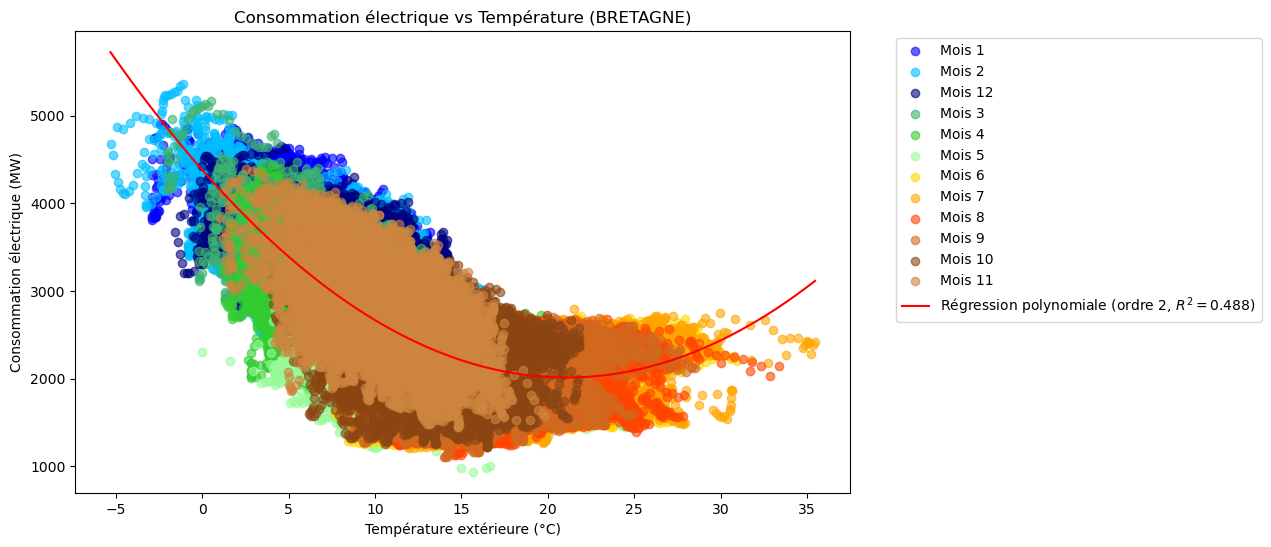

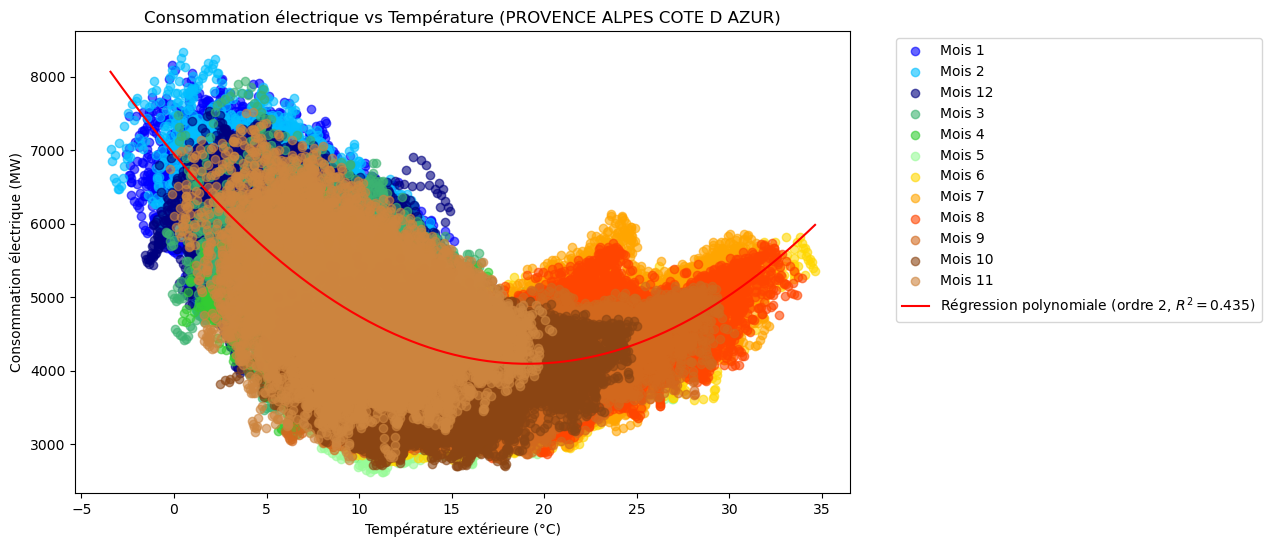

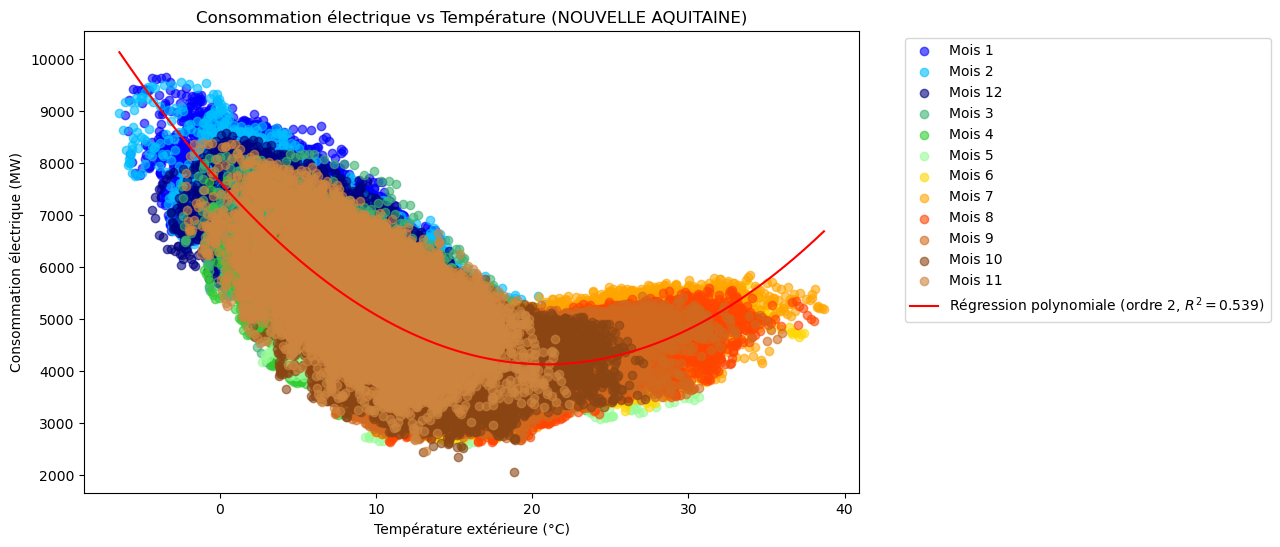

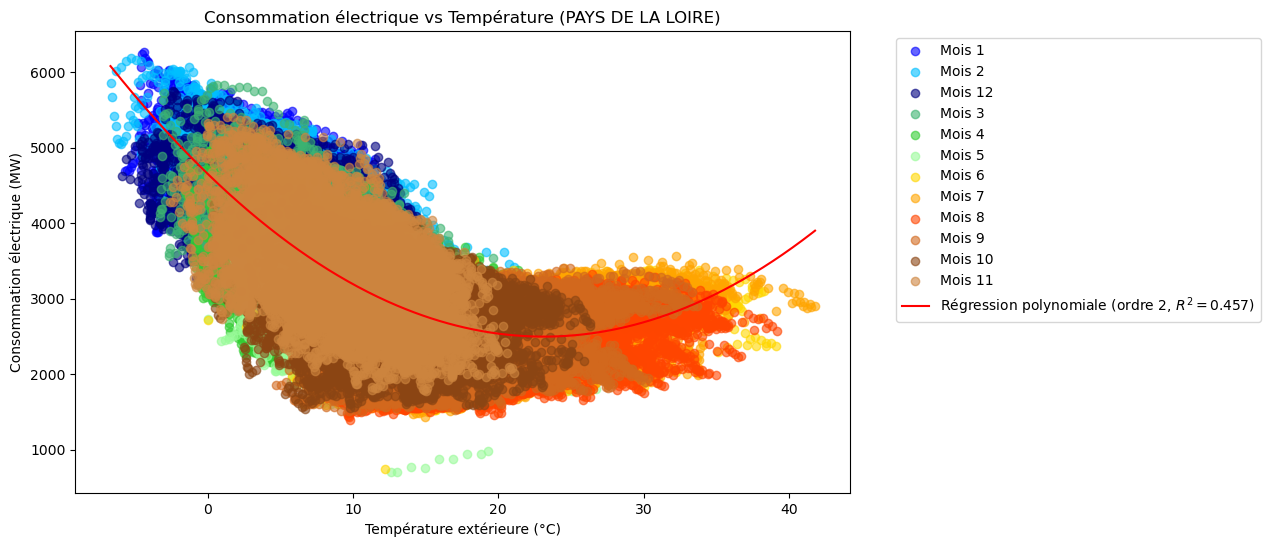

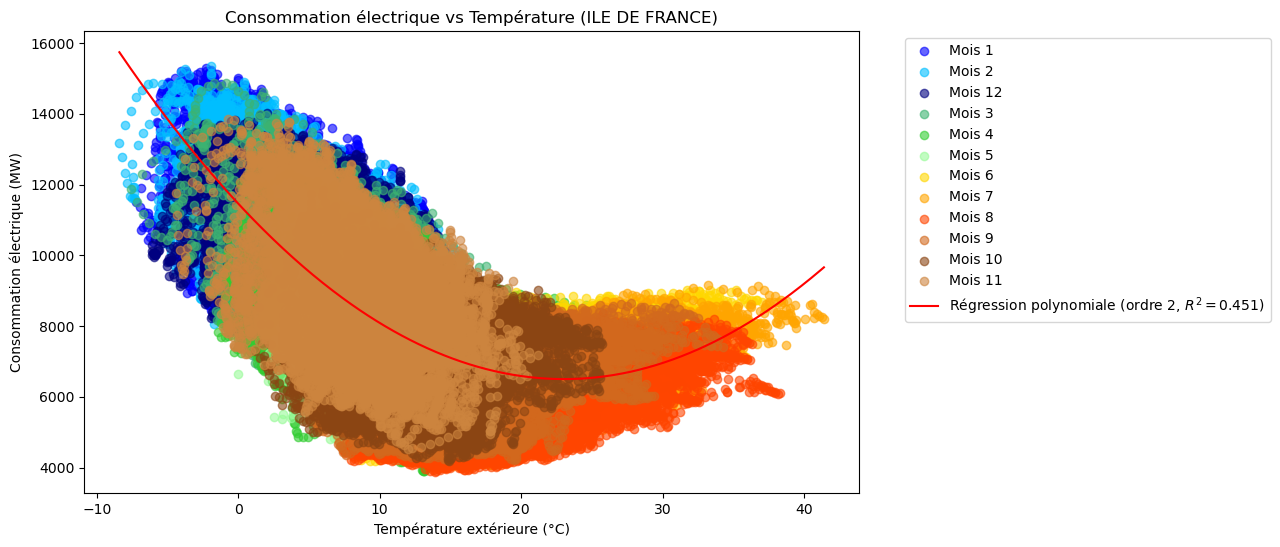

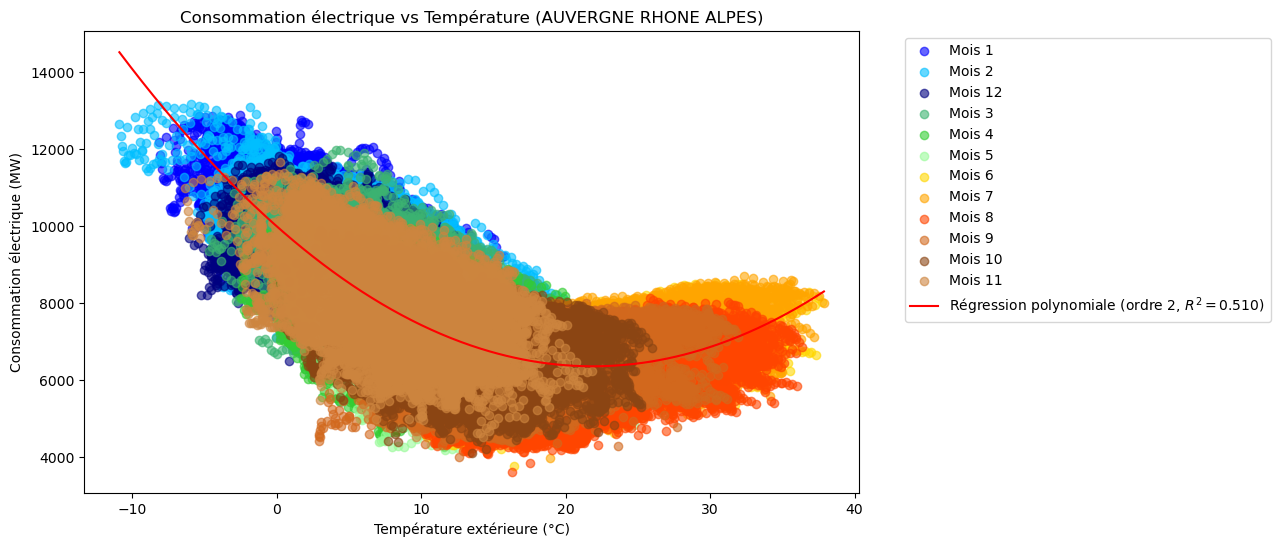

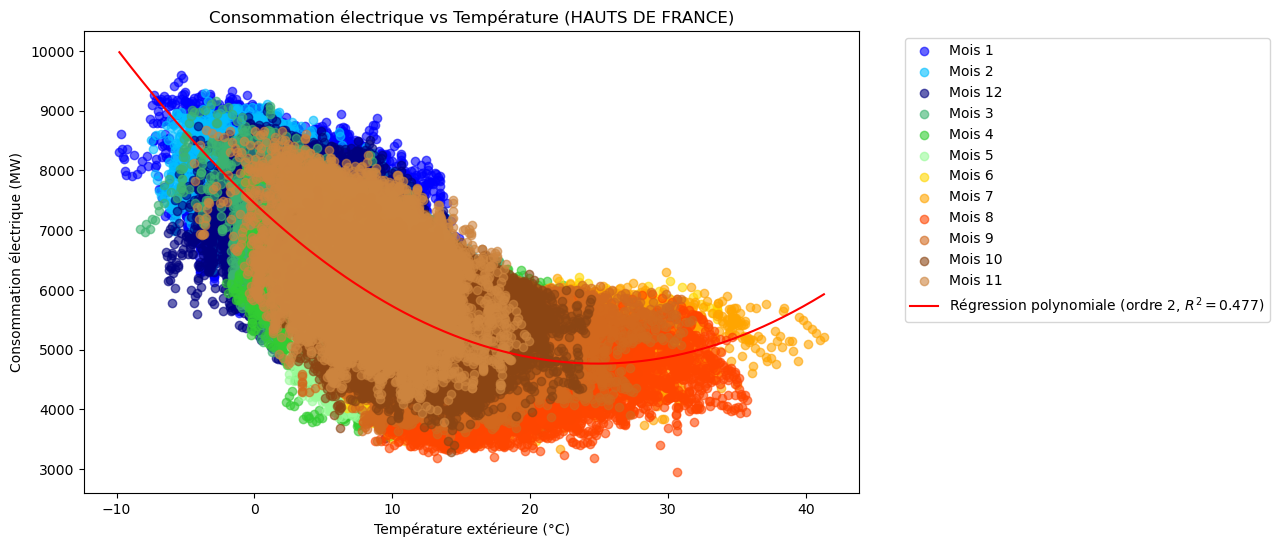

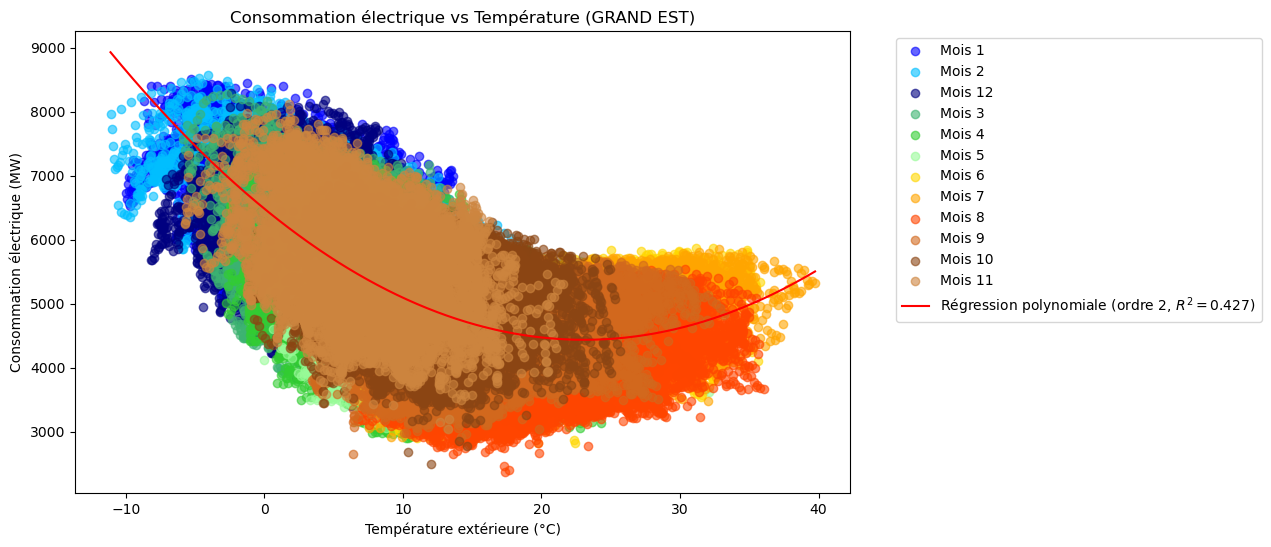

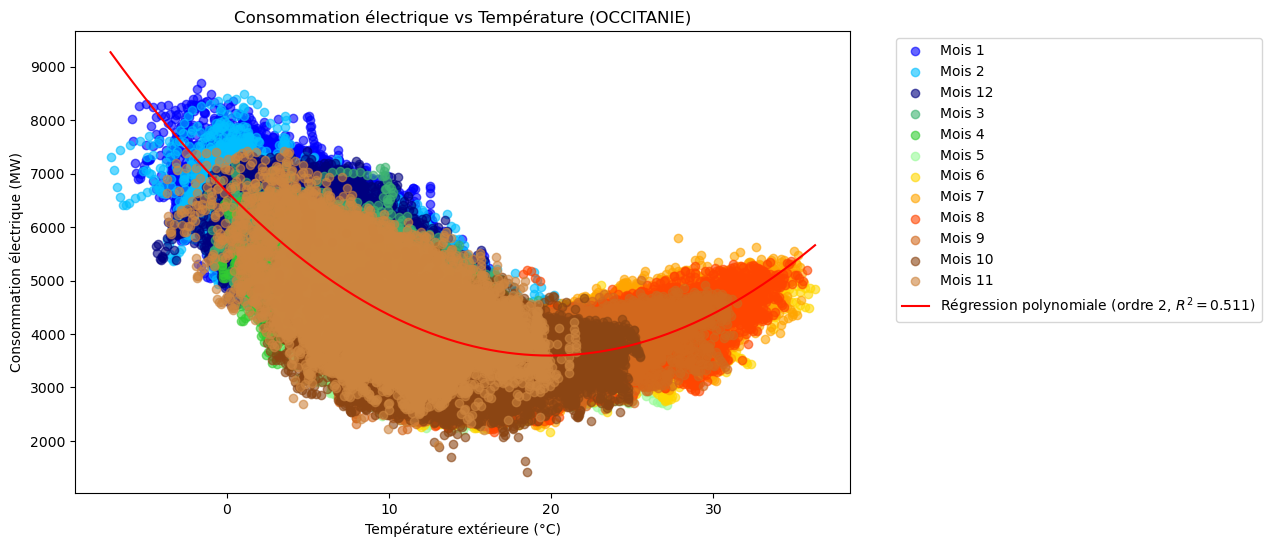

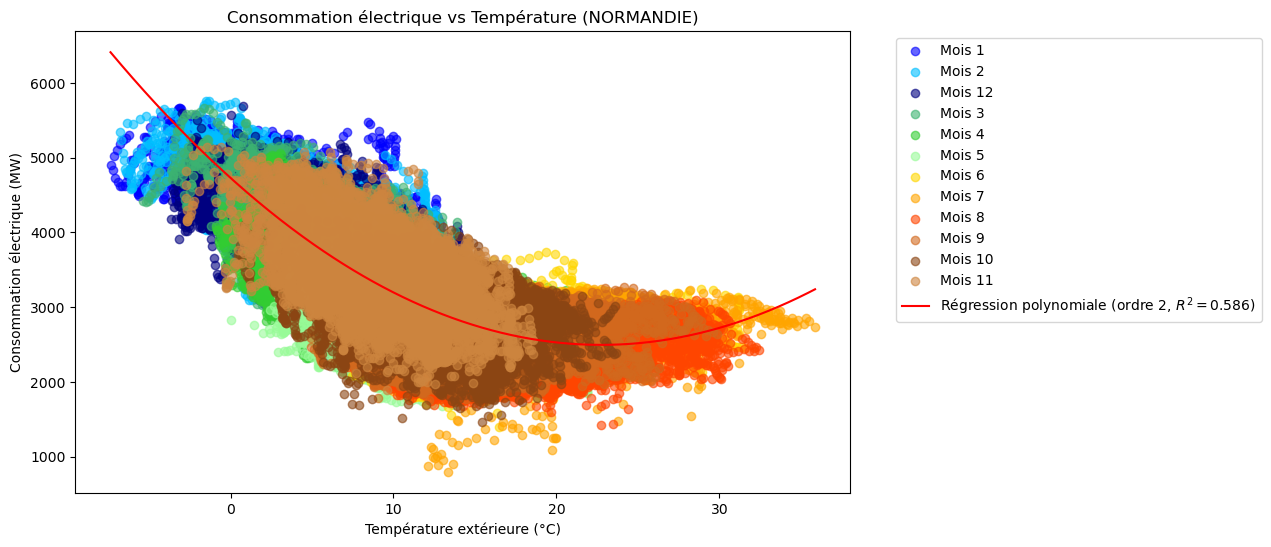

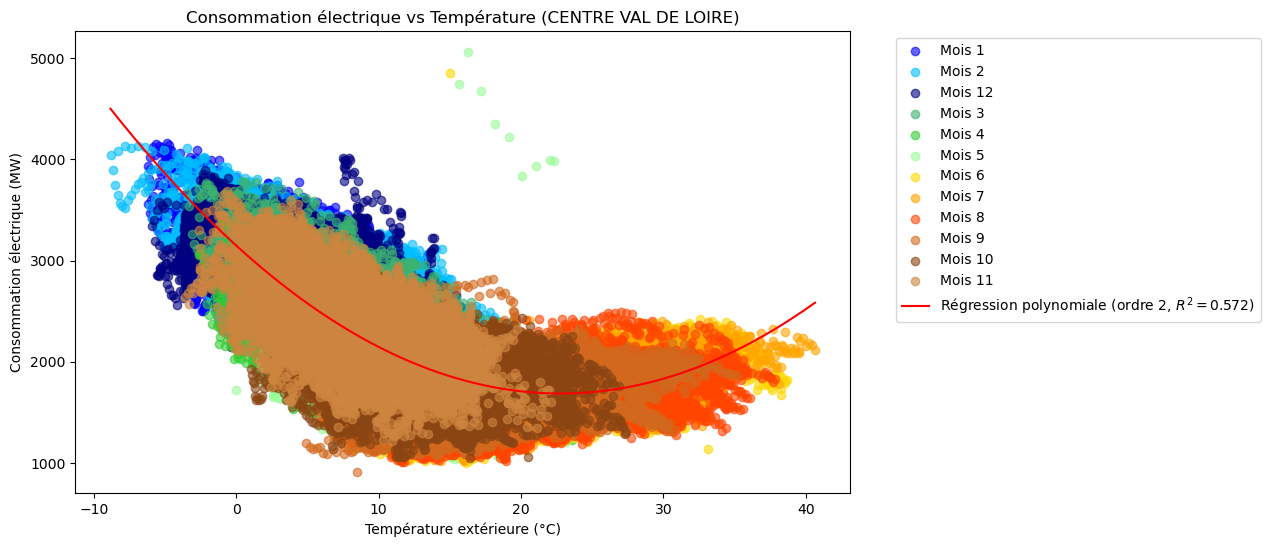

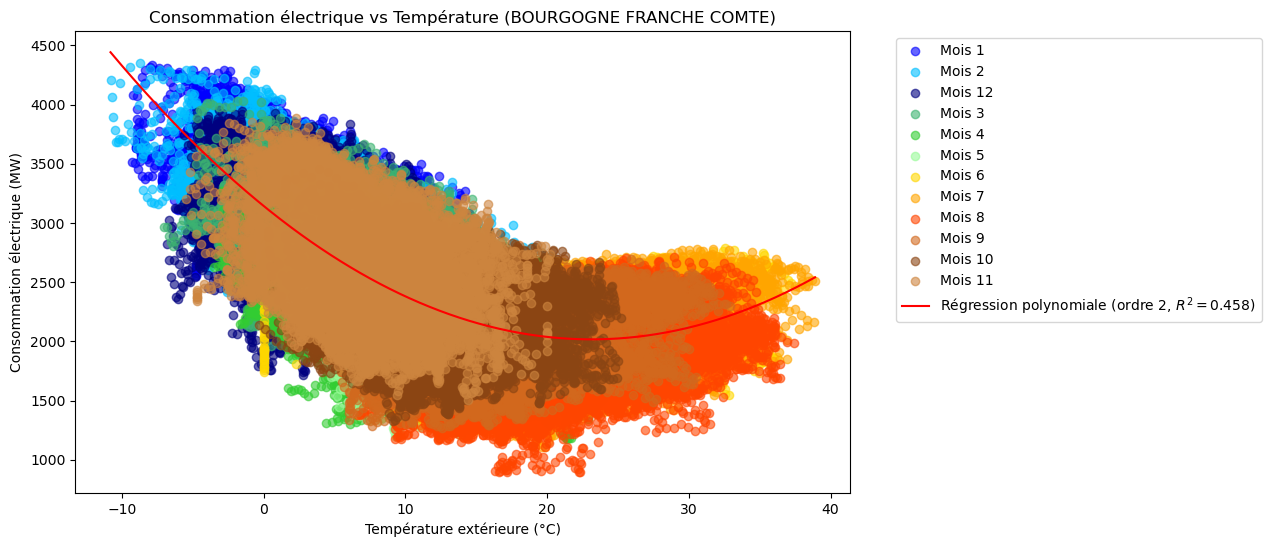

Graphiques sauvegardés dans le répertoire : Graphiques_Conso_Poly_CouleurMois


In [8]:
regions = df_conso_meteo['region'].unique()

for region in regions:
    # Filtration des données de la région
    data_region = df_conso_meteo[df_conso_meteo['region'] == region]
    data_region = data_region.dropna(subset=['temperature_C', 'consommation'])

    # Régression polynomiale d'ordre 2
    x = data_region['temperature_C']
    y = data_region['consommation']
    
    # Calcul des coefficients
    coeffs_poly_2 = np.polyfit(x, y, 2)
    poly_model_2 = np.poly1d(coeffs_poly_2)
    
    # Calcul des prédictions et de R²
    y_pred = poly_model_2(x)
    r2_value = r2_score(y, y_pred)

    # Points pour tracer la courbe polynomiale
    x_range = np.linspace(x.min(), x.max(), 500)

    # Création du graphique
    plt.figure(figsize=(10, 6))

    # Tracé des points colorés par mois
    for mois, color in couleurs_saisons.items():
        subset = data_region[data_region['mois'] == mois]
        plt.scatter(
            subset['temperature_C'], 
            subset['consommation'], 
            color=color, 
            alpha=0.6, 
            label=f"Mois {mois}" if f"Mois {mois}" not in plt.gca().get_legend_handles_labels()[1] else ""
        )

    # Tracé de la courbe polynomiale
    plt.plot(x_range, poly_model_2(x_range), color='red', label=f"Régression polynomiale (ordre 2, $R^2={r2_value:.3f}$)")

    # Titres et légendes
    plt.title(f"Consommation électrique vs Température ({region})")
    plt.xlabel("Température extérieure (°C)")
    plt.ylabel("Consommation électrique (MW)")
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

    # Sauvegarde du graphique
    output_file = os.path.join(output_dir, f"Conso_Temp_Poly_2_Mois_{region}.png")
    plt.savefig(output_file, dpi=300, bbox_inches='tight')
    plt.show()

print(f"Graphiques sauvegardés dans le répertoire : {output_dir}")

In [9]:
# ==== 1. Visualisation par Nuage de Points de la consommation en fonction de la température (Scatter Plot)avec régressions polynomiales d'ordre 2 

In [10]:
# Dictionnaire de couleurs par mois
couleurs_saisons = {
    1: 'blue', 2: 'deepskyblue', 12: 'navy',  # Hiver
    3: 'mediumseagreen', 4: 'limegreen', 5: 'palegreen',  # Printemps
    6: 'gold', 7: 'orange', 8: 'orangered',  # Été
    9: 'chocolate', 10: 'saddlebrown', 11: 'peru'  # Automne
}

In [11]:
# Répertoire de sortie
output_dir = "Graphiques_Conso_Poly_CouleurMois"
os.makedirs(output_dir, exist_ok=True)

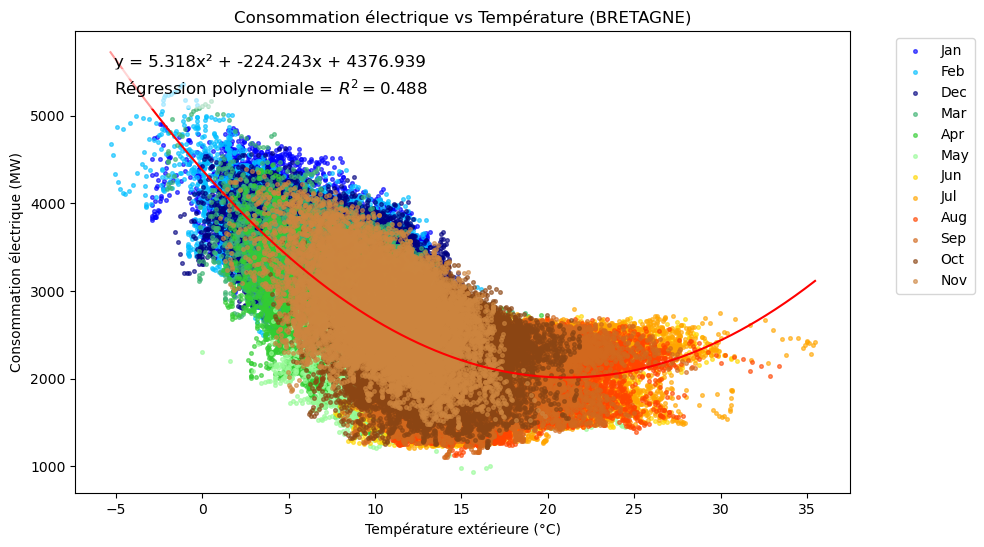

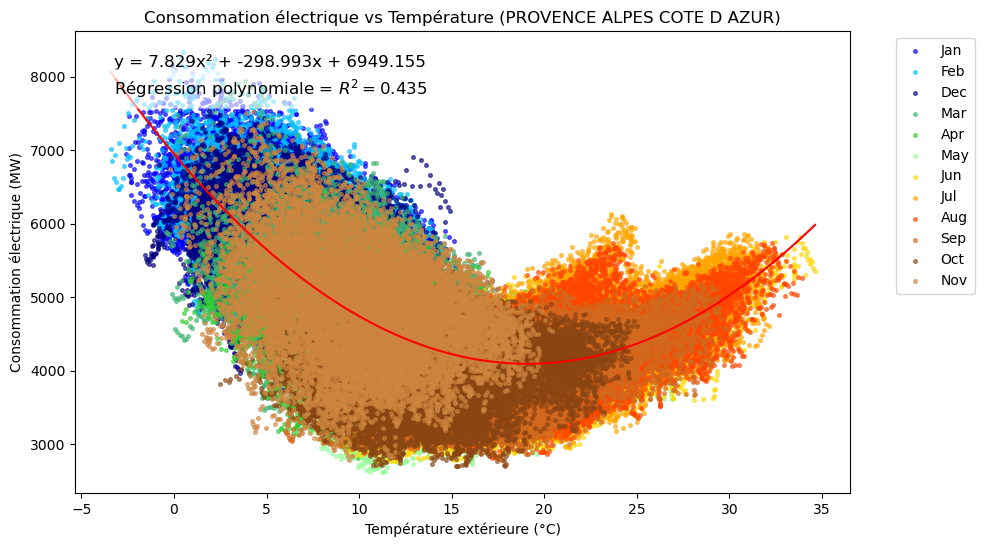

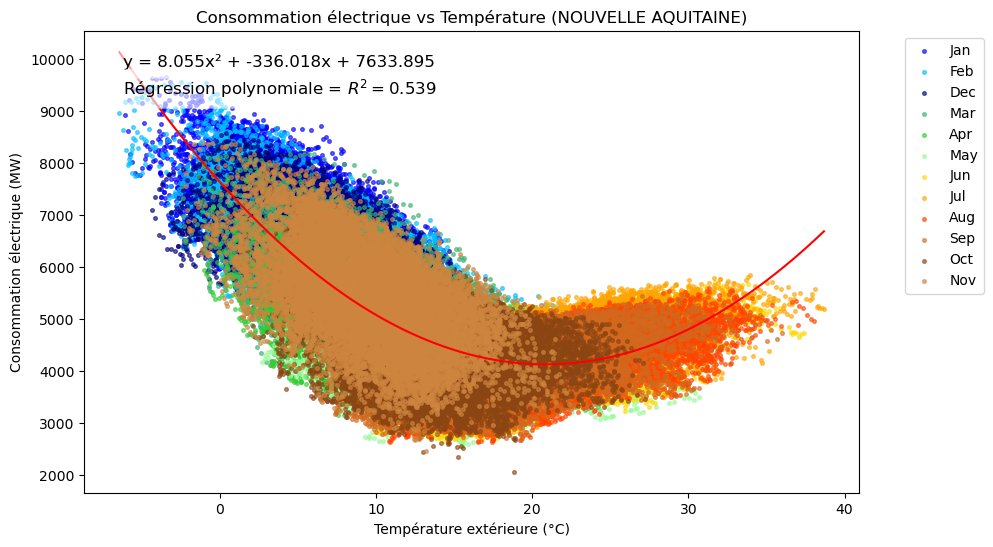

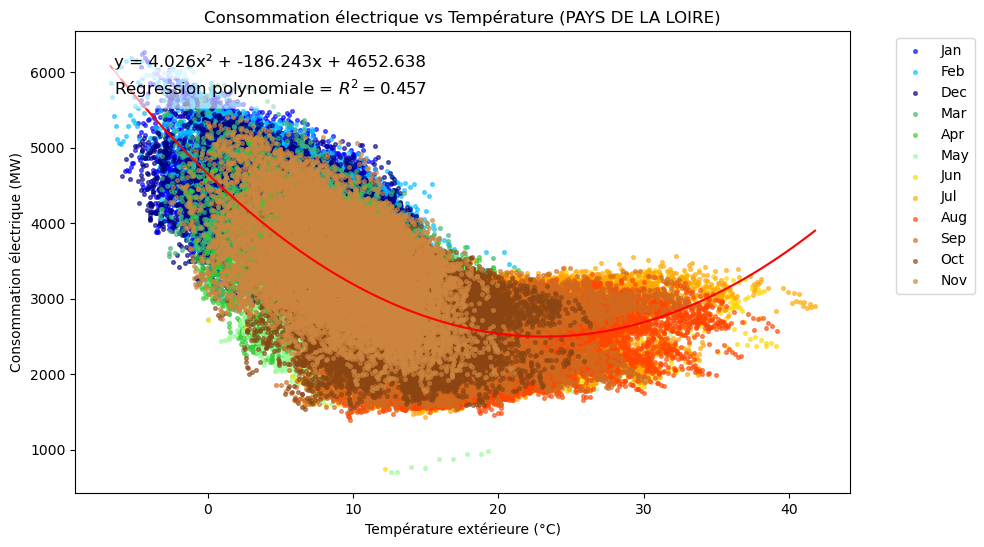

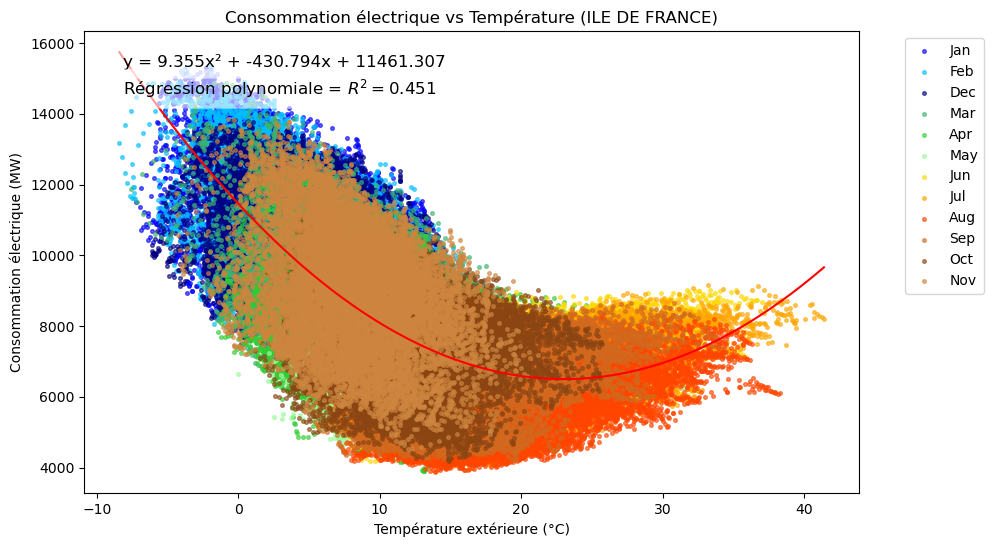

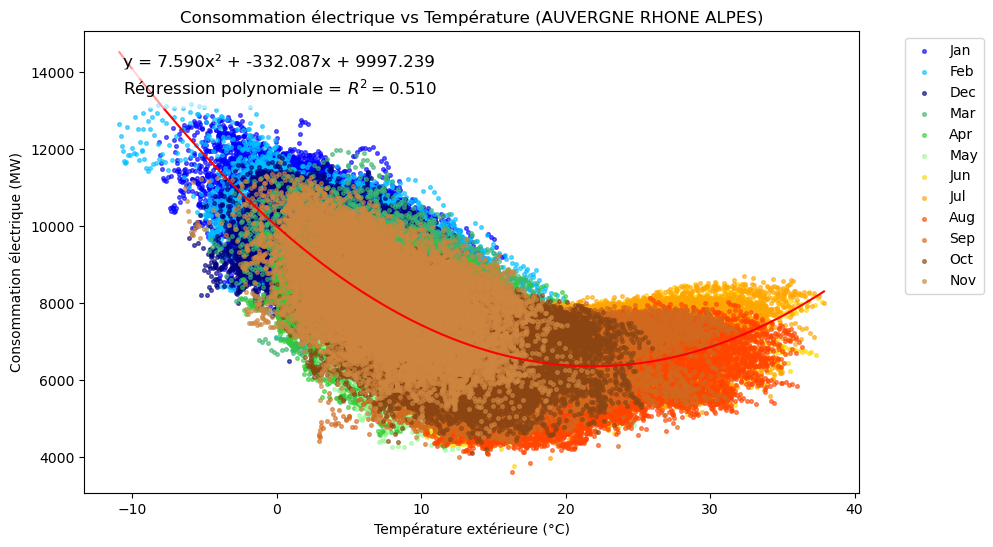

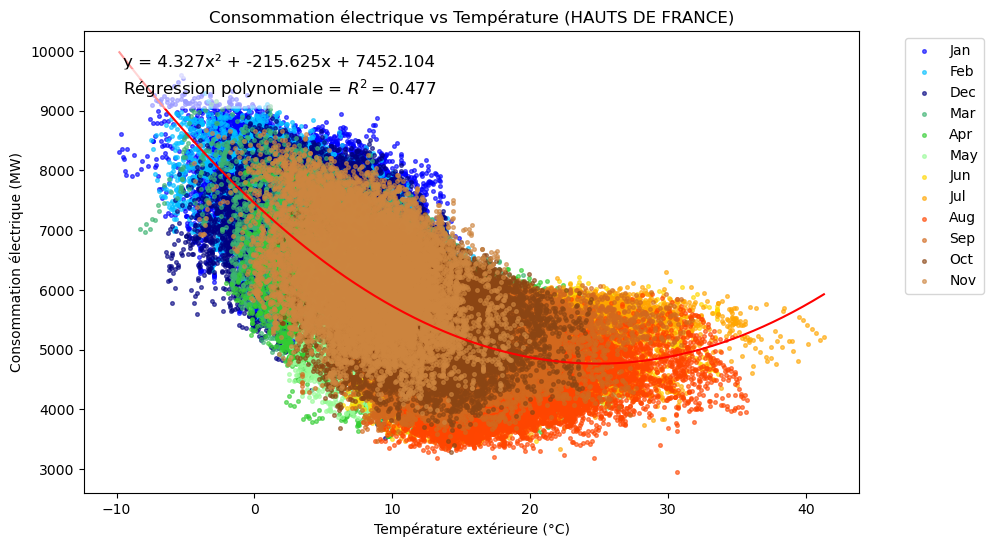

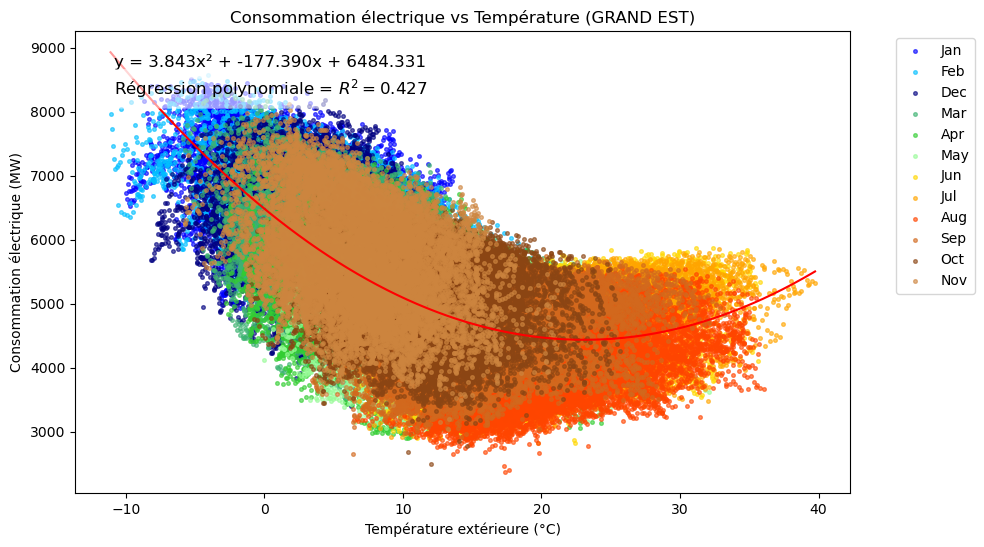

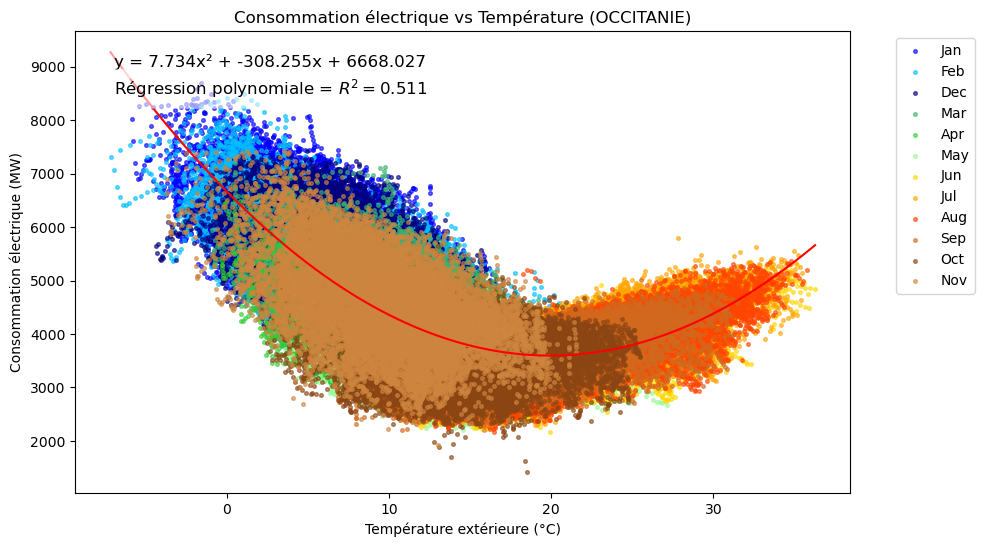

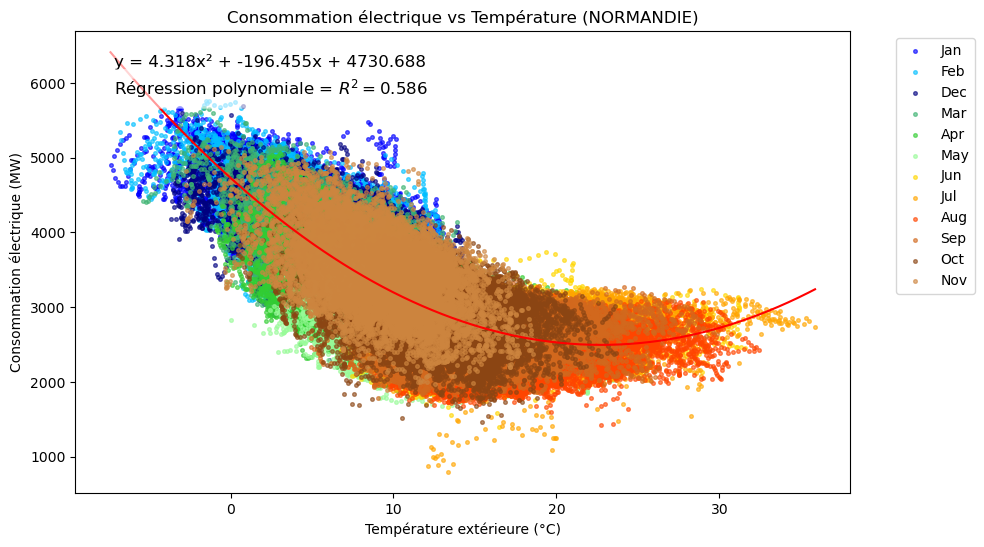

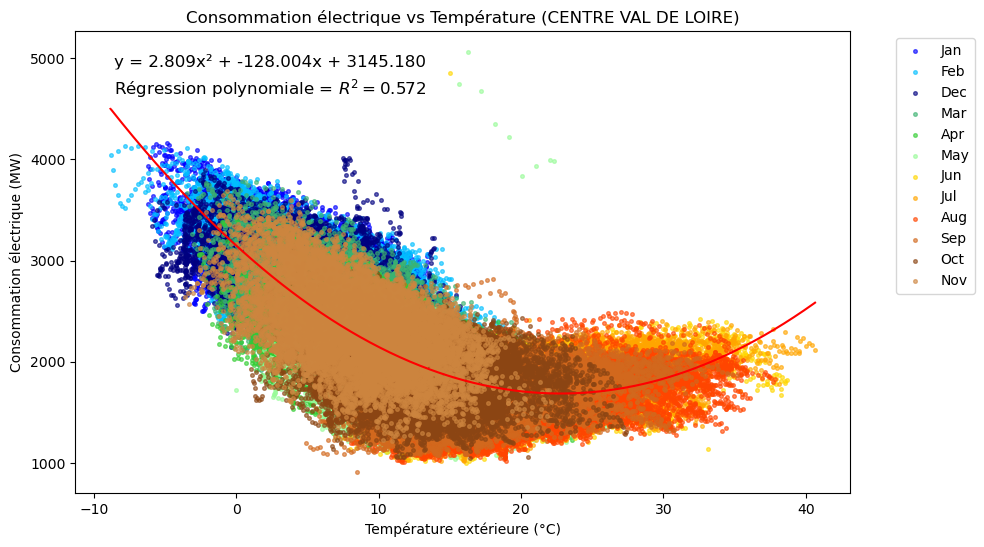

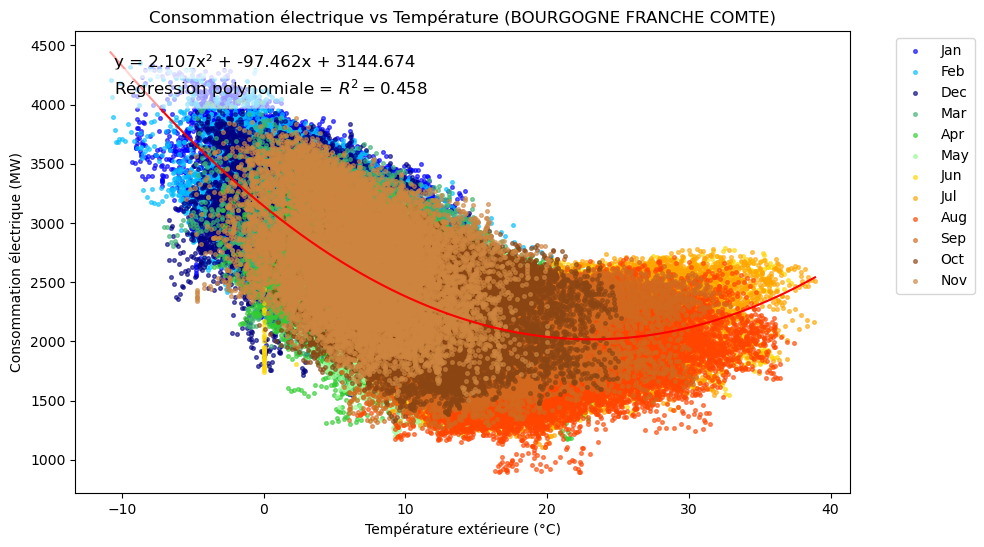

Graphiques sauvegardés dans le répertoire : Graphiques_Conso_Poly_CouleurMois


In [12]:
regions = df_conso_meteo['region'].unique()

for region in regions:
    # Filtration des données de la région
    data_region = df_conso_meteo[df_conso_meteo['region'] == region]
    data_region = data_region.dropna(subset=['temperature_C', 'consommation'])

    # Régression polynomiale d'ordre 2
    x = data_region['temperature_C']
    y = data_region['consommation']
    
    # Calcul des coefficients
    coeffs_poly_2 = np.polyfit(x, y, 2)
    poly_model_2 = np.poly1d(coeffs_poly_2)
    
    # Calcul des prédictions et de R²
    y_pred = poly_model_2(x)
    r2_value = r2_score(y, y_pred)

    # Points pour tracer la courbe polynomiale
    x_range = np.linspace(x.min(), x.max(), 500)

    # Création du graphique
    plt.figure(figsize=(10, 6))

    # Tracé des points colorés par mois
    for mois, color in couleurs_saisons.items():
        subset = data_region[data_region['mois'] == mois]
        plt.scatter(
            subset['temperature_C'], 
            subset['consommation'], 
            color=color, 
            alpha=0.6, 
            label=f"{subset['mois_nom'].iloc[0]}" if f"{subset['mois_nom'].iloc[0]}" not in plt.gca().get_legend_handles_labels()[1] else "",
            s=7  # Taille des points réduite d'1/3
        )

    # Tracé de la courbe polynomiale
    plt.plot(x_range, poly_model_2(x_range), color='red')

    # Affichage des coefficients du polynôme
    a, b, c = coeffs_poly_2
    equation_text = f"y = {a:.3f}x² + {b:.3f}x + {c:.3f}"
    plt.text(
        0.05, 0.95, equation_text, transform=plt.gca().transAxes, 
        fontsize=12, verticalalignment='top', horizontalalignment='left', 
        bbox=dict(facecolor='white', alpha=0.6, edgecolor='none', boxstyle='round,pad=0.5')
    )

    # Affichage de la régression polynomiale à côté de l'équation
    poly_label = f"Régression polynomiale = $R^2={r2_value:.3f}$"
    plt.text(
        0.05, 0.90, poly_label, transform=plt.gca().transAxes, 
        fontsize=12, verticalalignment='top', horizontalalignment='left', 
        bbox=dict(facecolor='white', alpha=0.6, edgecolor='none', boxstyle='round,pad=0.5')
    )

    # Titres et légendes
    plt.title(f"Consommation électrique vs Température ({region})")
    plt.xlabel("Température extérieure (°C)")
    plt.ylabel("Consommation électrique (MW)")

    # Trier la légende par mois (ordre croissant de l'année)
    mois_order = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
    sorted_labels = [mois_order[i-1] for i in couleurs_saisons.keys()]
    
    plt.legend(sorted_labels, bbox_to_anchor=(1.05, 1), loc='upper left')  # Légende triée par mois

    # Sauvegarde du graphique
    output_file = os.path.join(output_dir, f"Conso_Temp_Poly_2_Mois_{region}.png")
    plt.savefig(output_file, dpi=300, bbox_inches='tight')
    plt.show()

print(f"Graphiques sauvegardés dans le répertoire : {output_dir}")

In [13]:
#======================    ANALYSE DE SCET ==========================================================

In [14]:
# *********** BOXPLOTS de SCET par région et par année

# Filtrage des données entre 2013 et 2022
df_filtered = df_conso_meteo[(df_conso_meteo['annee'] >= 2013) & (df_conso_meteo['annee'] <= 2022)]

# Création d'un dossier pour enregistrer les graphiques
output_dir = "Boxplots_SCET_Regions"
os.makedirs(output_dir, exist_ok=True)

# Liste unique des régions
regions = df_filtered['region'].unique()

# Génération des boxplots pour chaque région
for region in regions:
    # Filtrage des données par région
    df_region = df_filtered[df_filtered['region'] == region]
    
    plt.figure(figsize=(14, 8))
    sns.boxplot(data=df_region, x='annee', y='SCET', hue='annee', dodge=False, palette='Set2', legend=False)
    
    plt.title(f"Distribution de SCET par année pour la région {region}")
    plt.xlabel("Année")
    plt.ylabel("SCET")
    
    # Sauvegarde du graphique
    plt.savefig(f"{output_dir}/boxplot_SCET_{region}.png", dpi=300)
    plt.close()

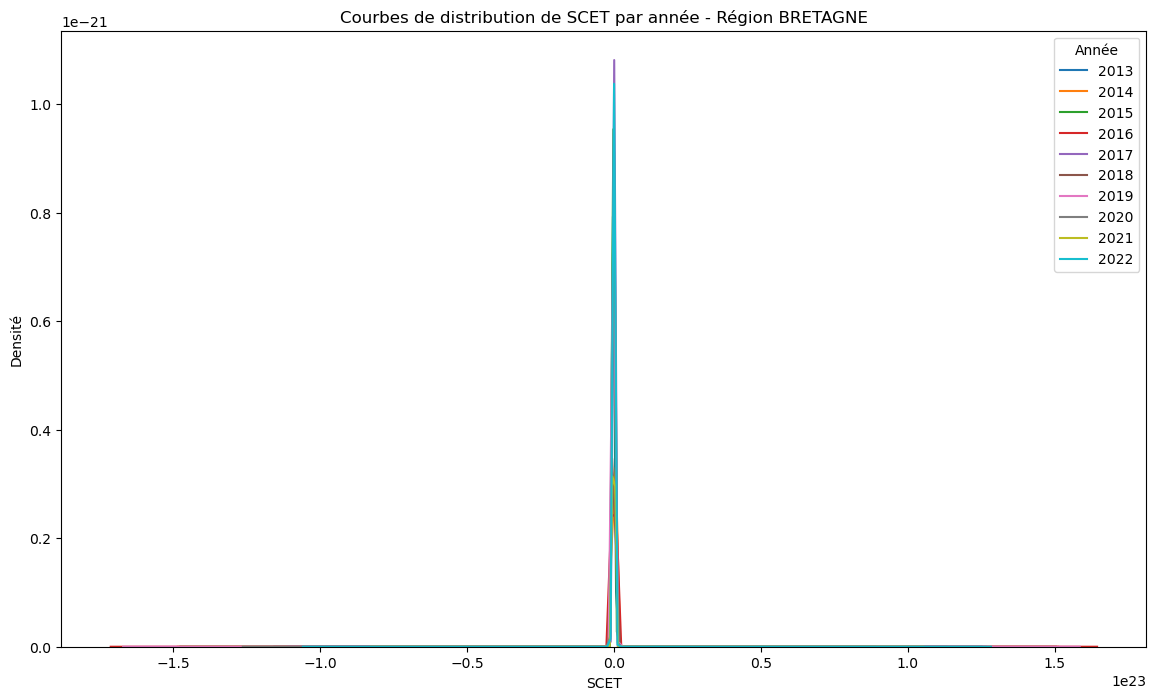

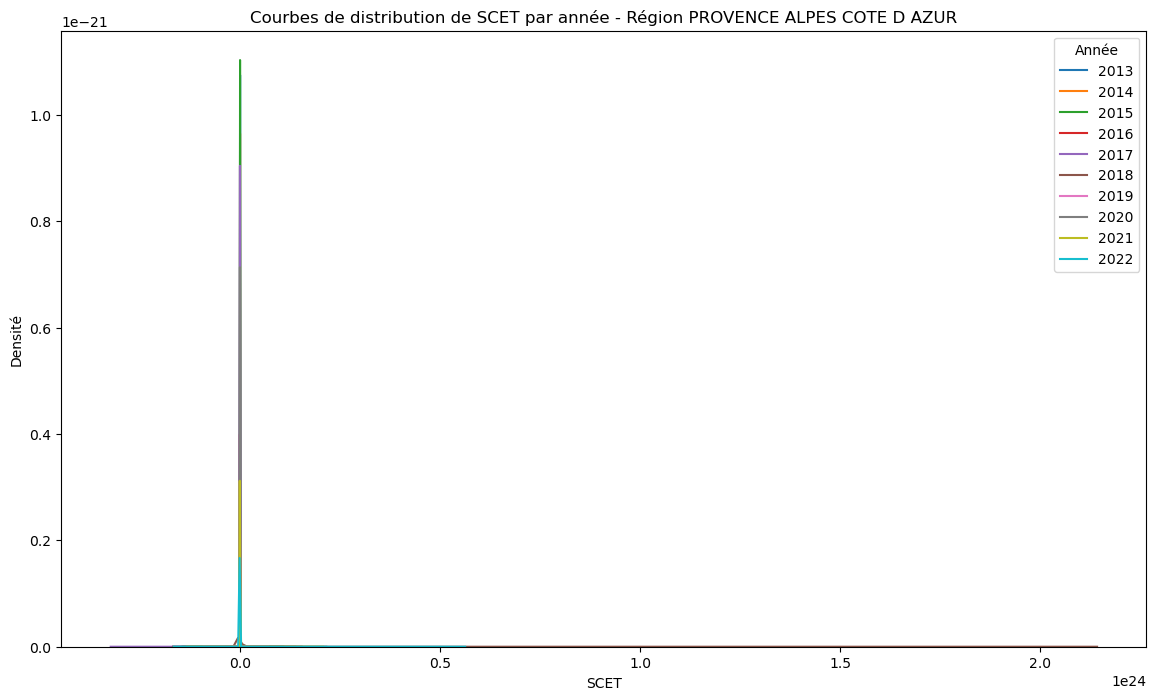

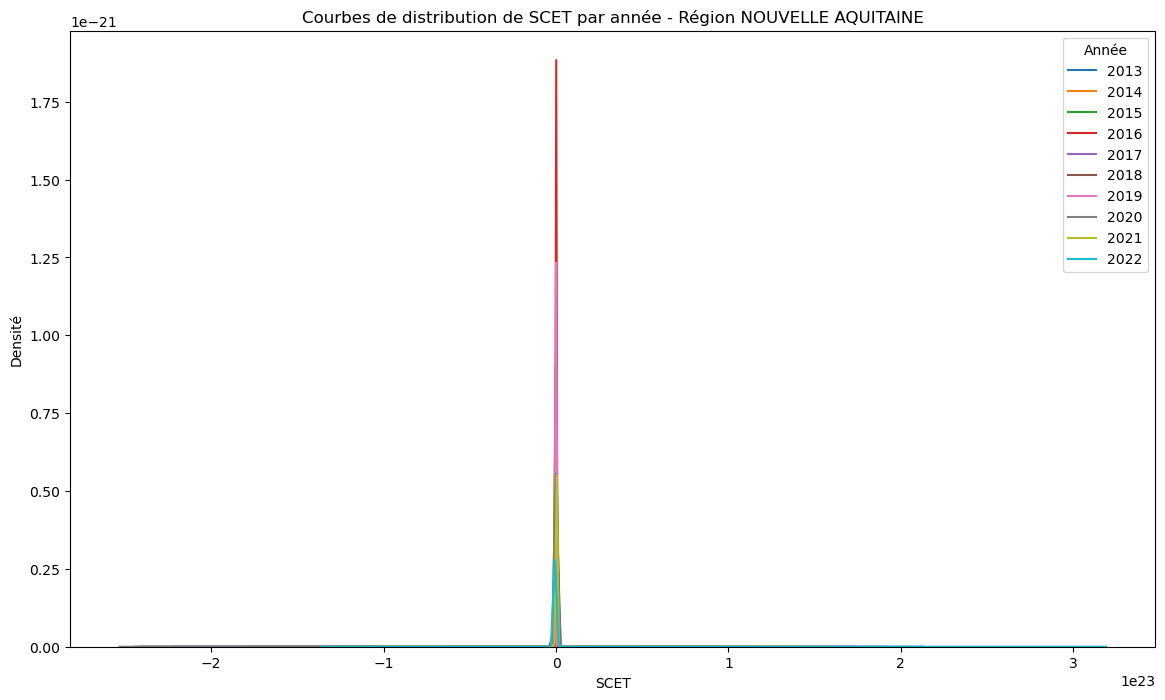

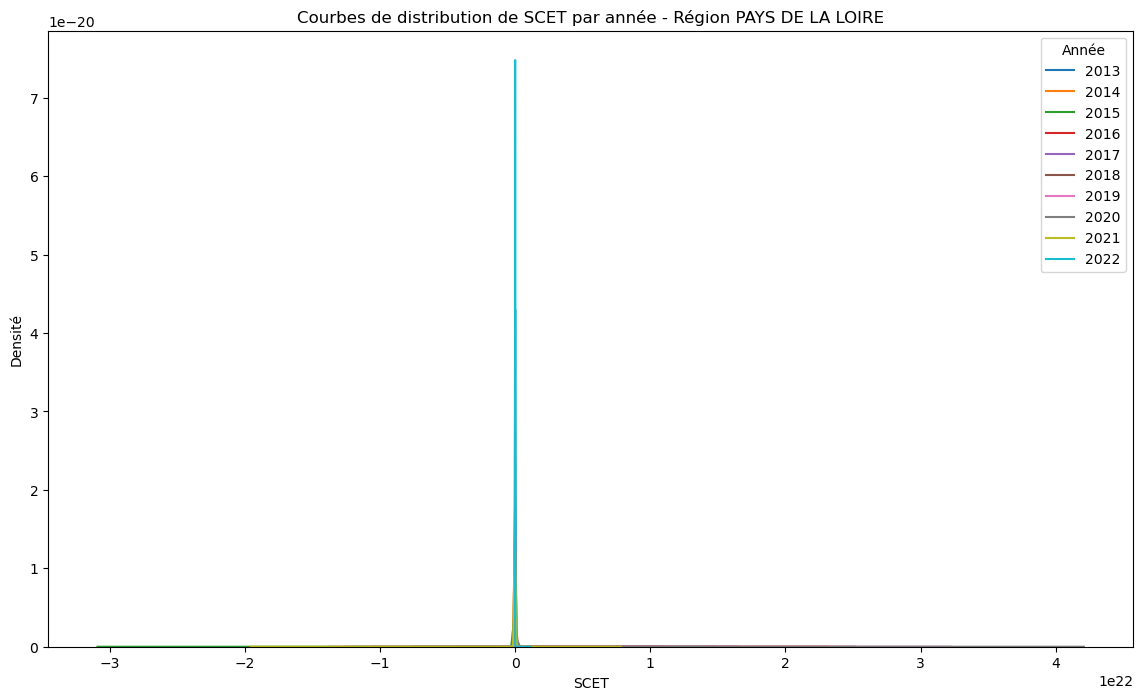

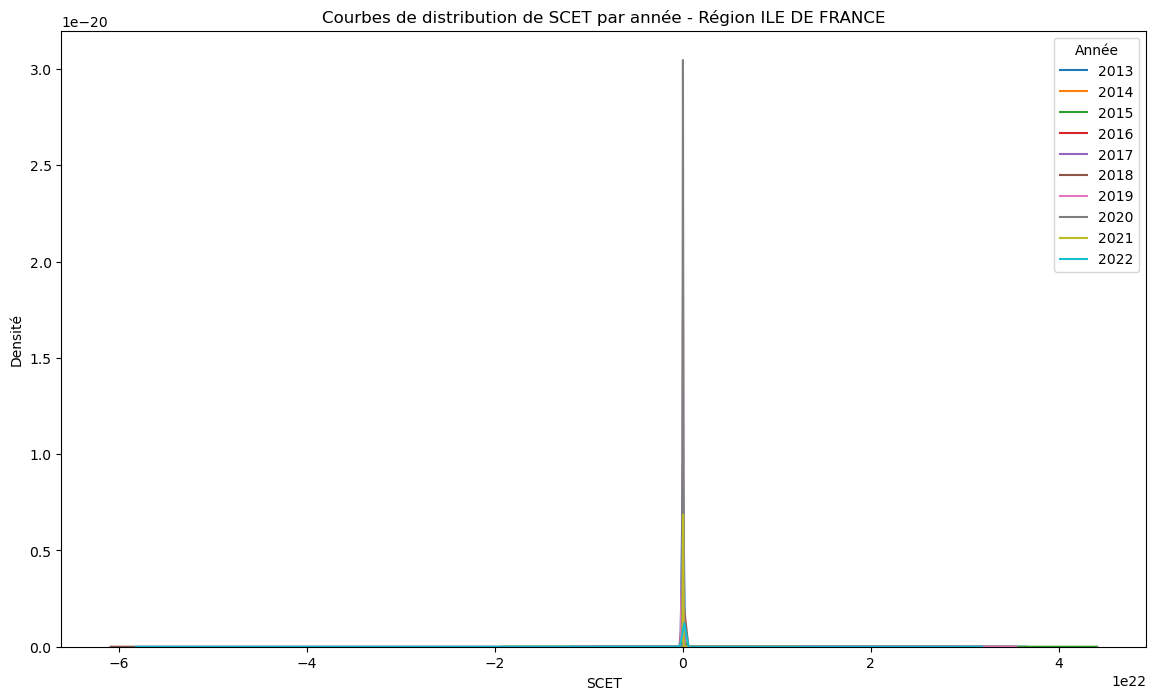

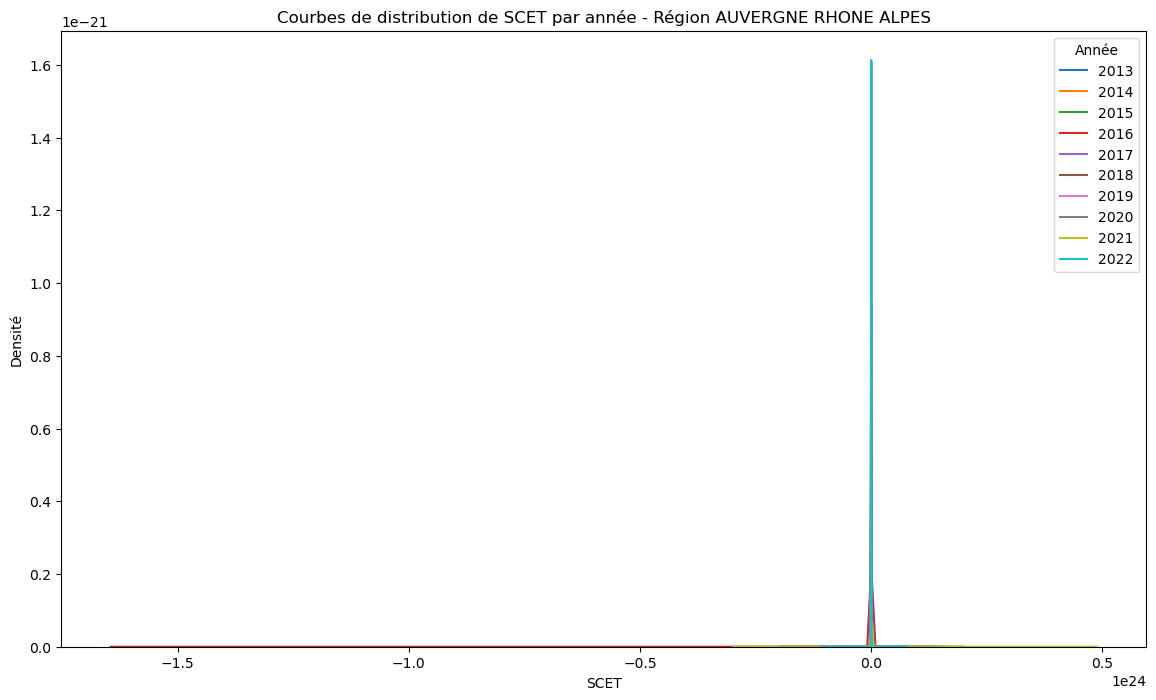

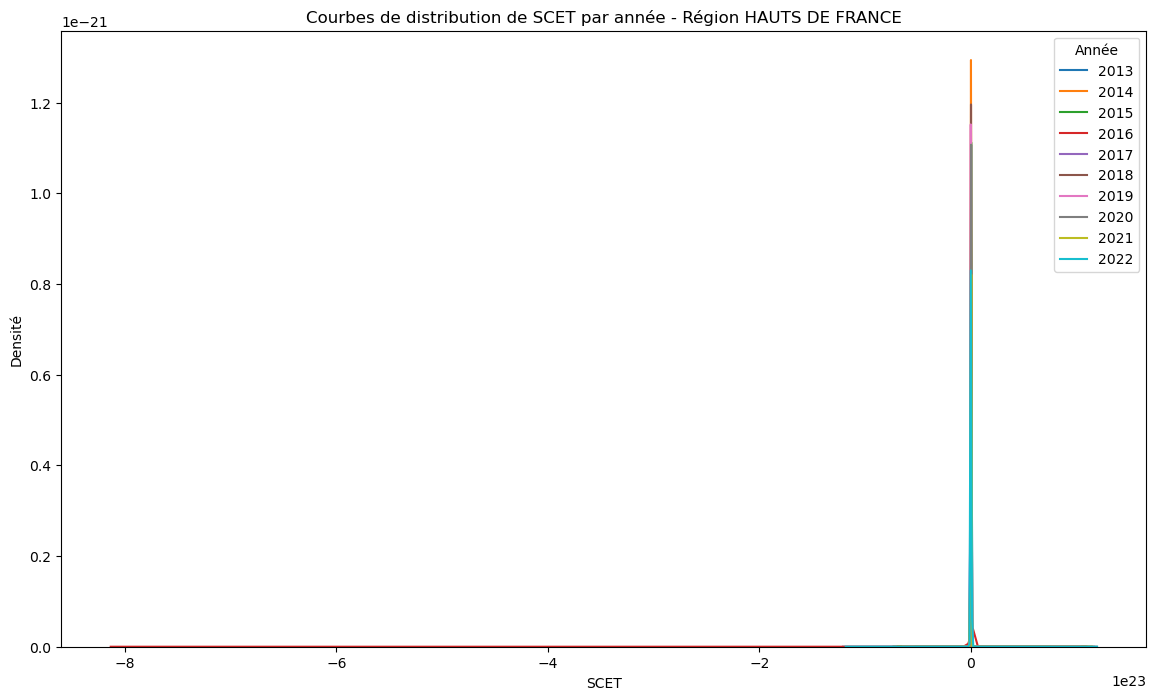

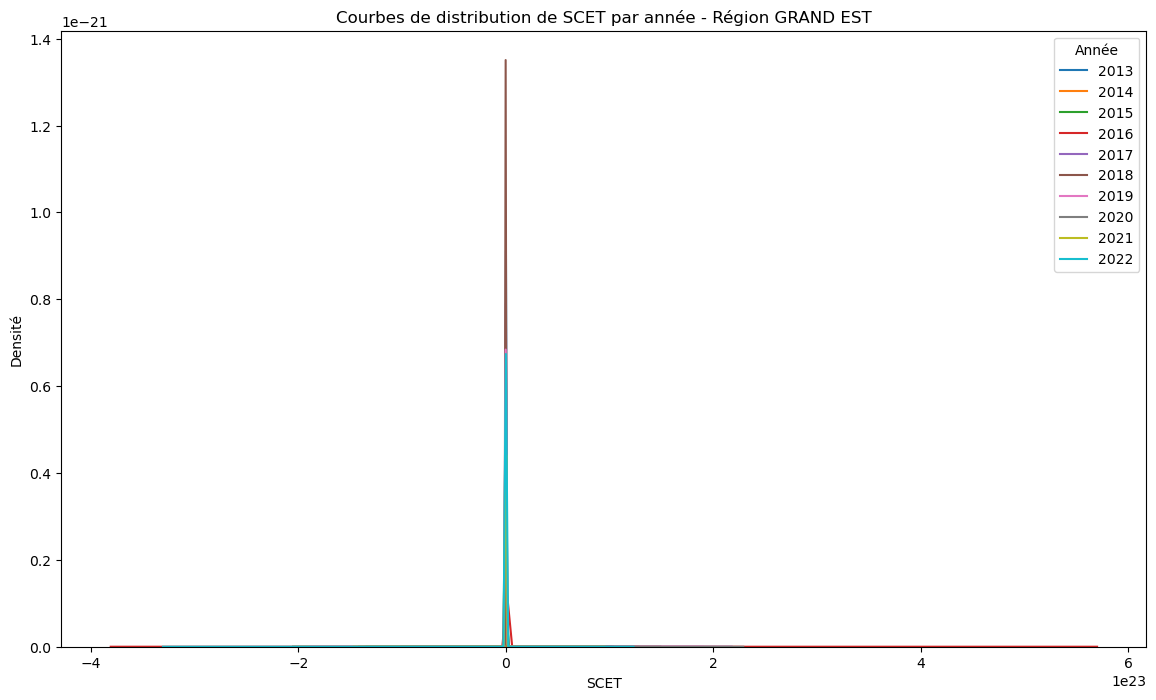

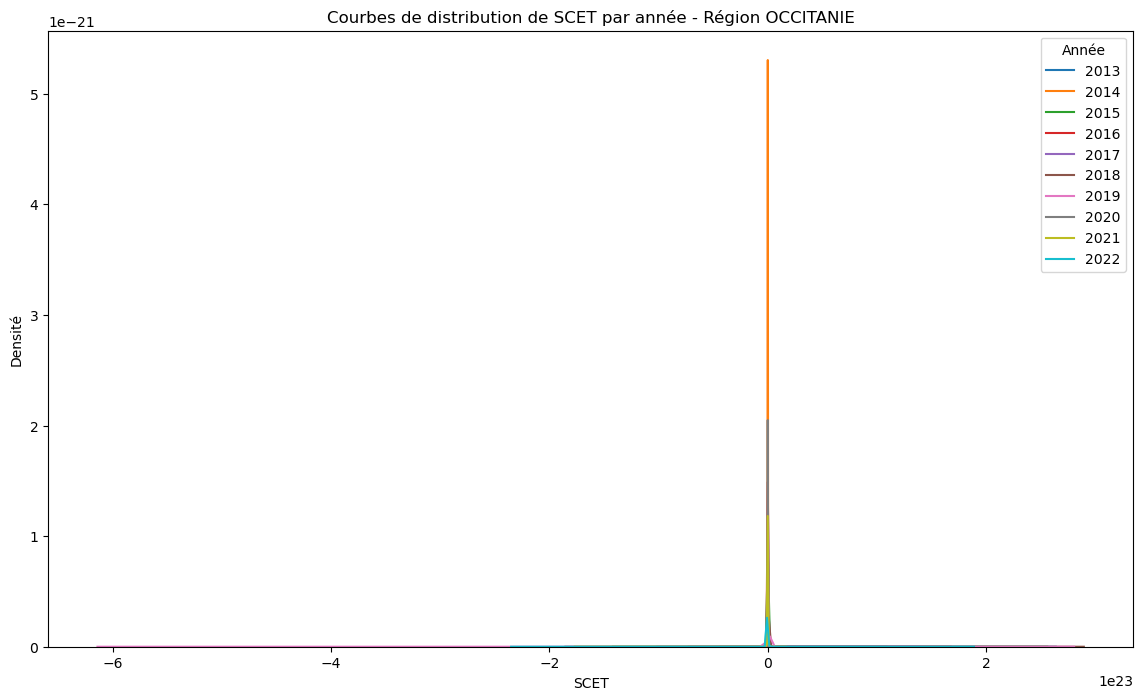

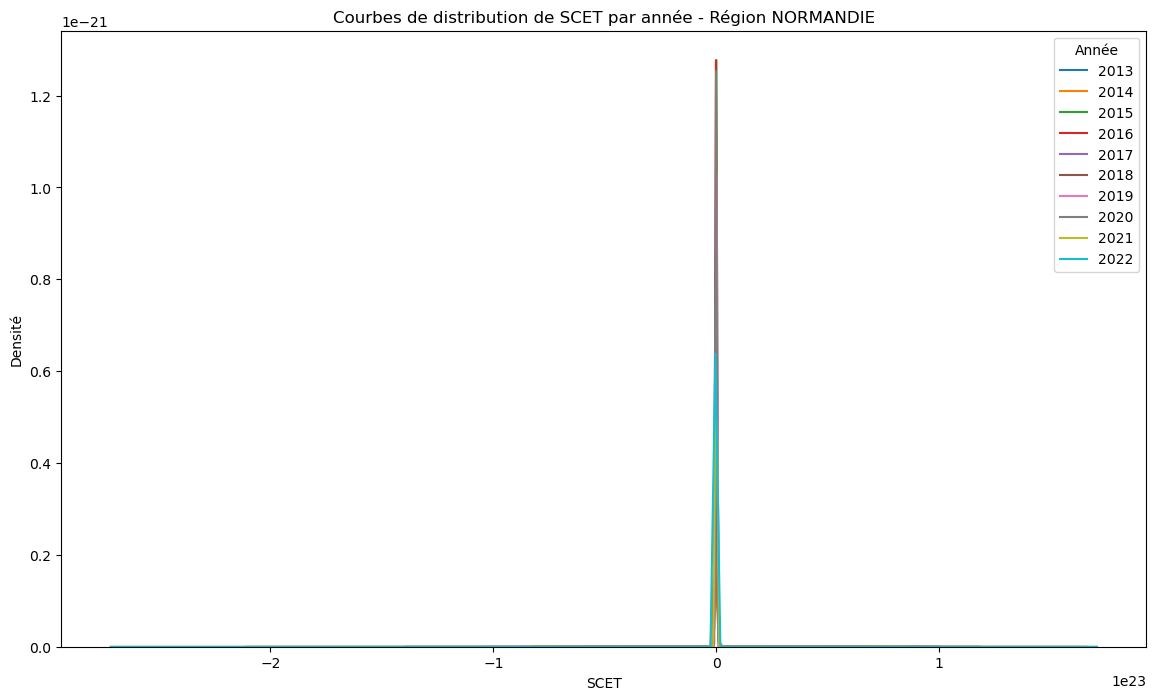

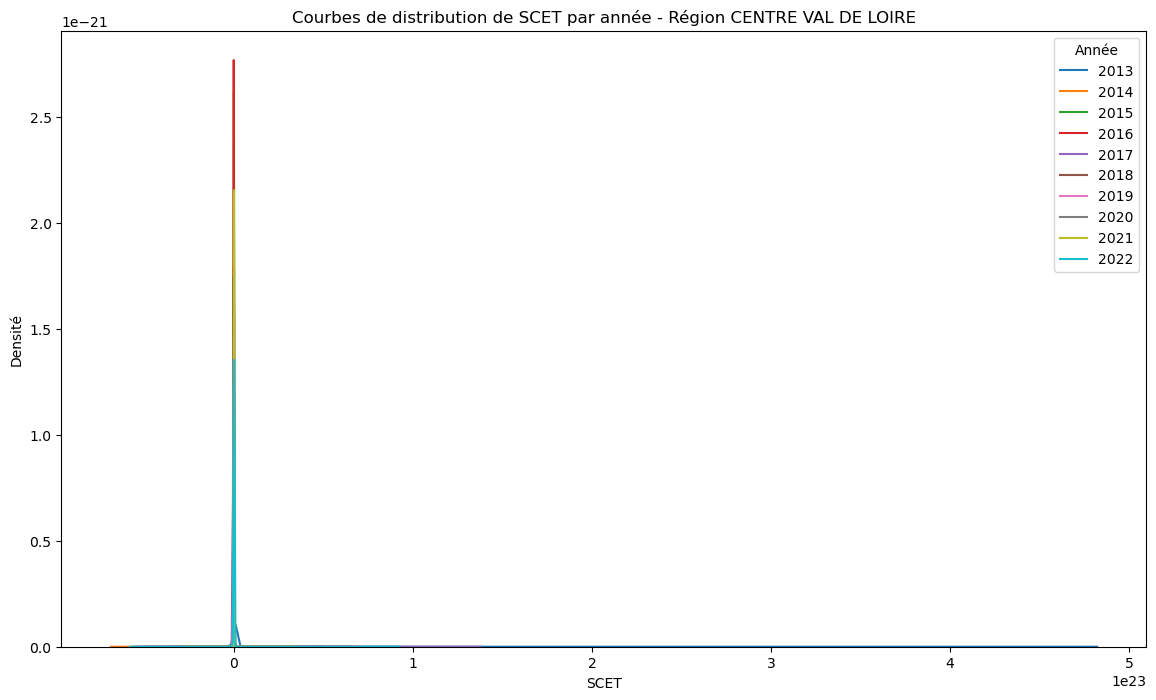

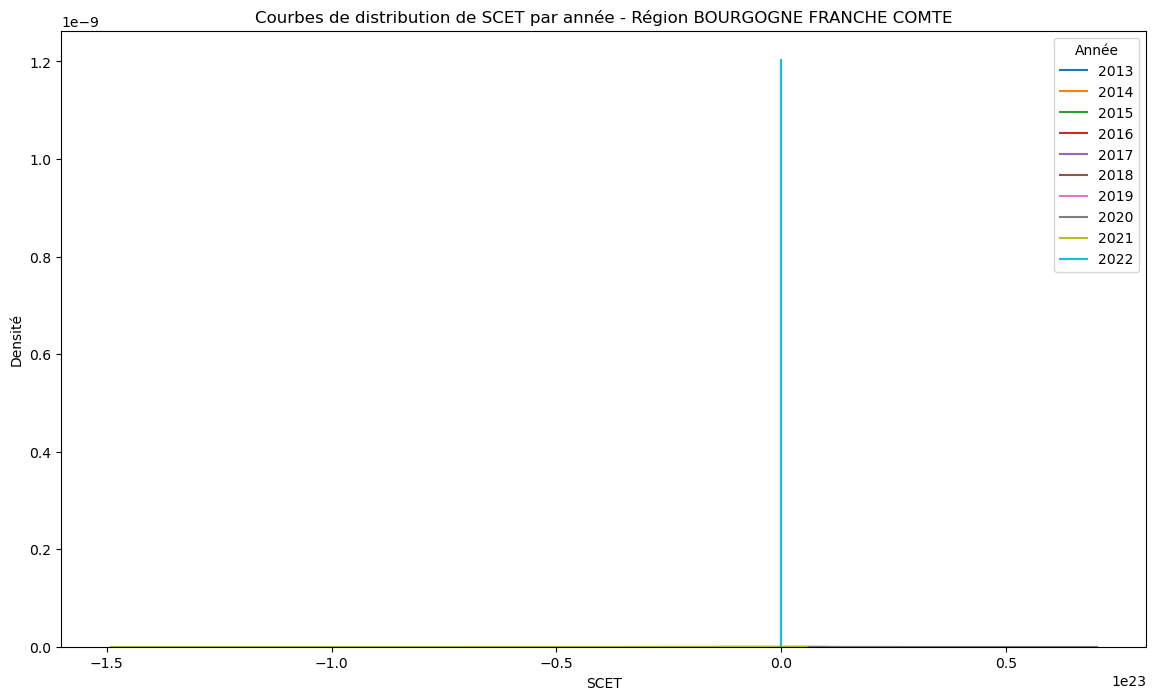

In [15]:
# *********** COURBES DE DISTRIBUTION de SCET par région et par année

# Création d'un dossier pour enregistrer les graphiques
output_dir = "Distributions_SCET_Regions"
os.makedirs(output_dir, exist_ok=True)

# Génération des graphiques pour chaque région
for region in regions:
    df_region = df_filtered[df_filtered['region'] == region]
    
    plt.figure(figsize=(14, 8))
    
    # Tracé des distributions KDE pour chaque année
    for annee in sorted(df_region['annee'].unique()):
        subset = df_region[df_region['annee'] == annee]
        sns.kdeplot(data=subset, x='SCET', label=f"{annee}", linewidth=1.5)
    
    plt.title(f"Courbes de distribution de SCET par année - Région {region}")
    plt.xlabel("SCET")
    plt.ylabel("Densité")
    plt.legend(title="Année")
    
    # Sauvegarde du graphique
    plt.savefig(f"{output_dir}/distribution_SCET_{region}.png", dpi=300)
    plt.show()

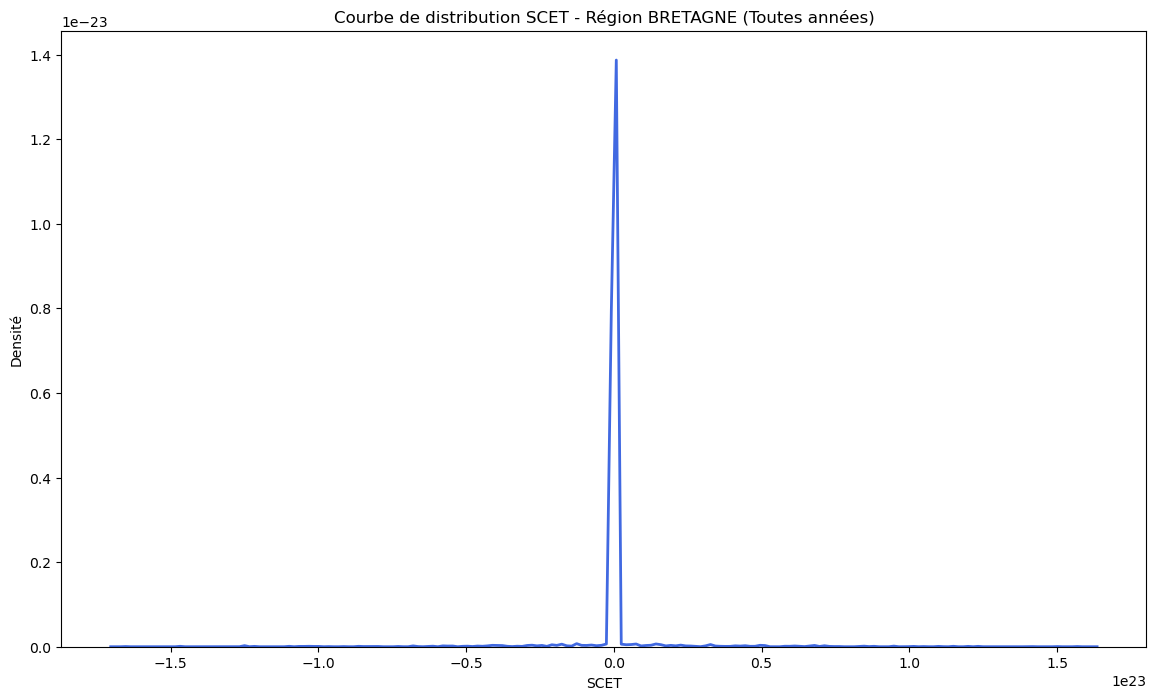

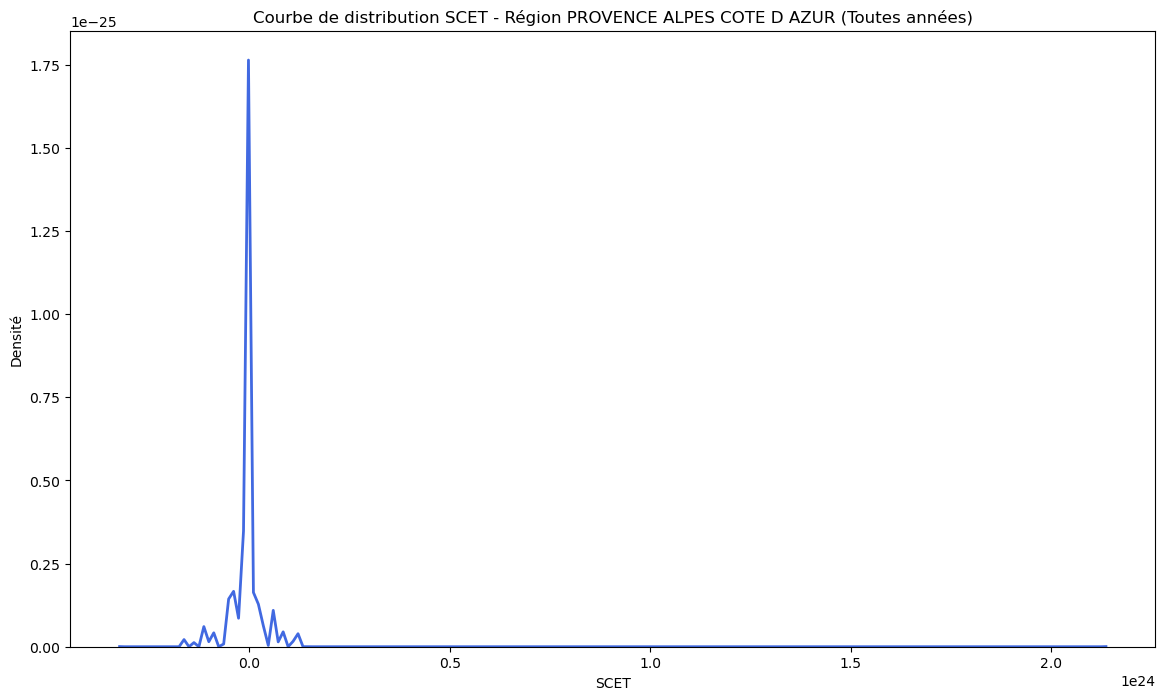

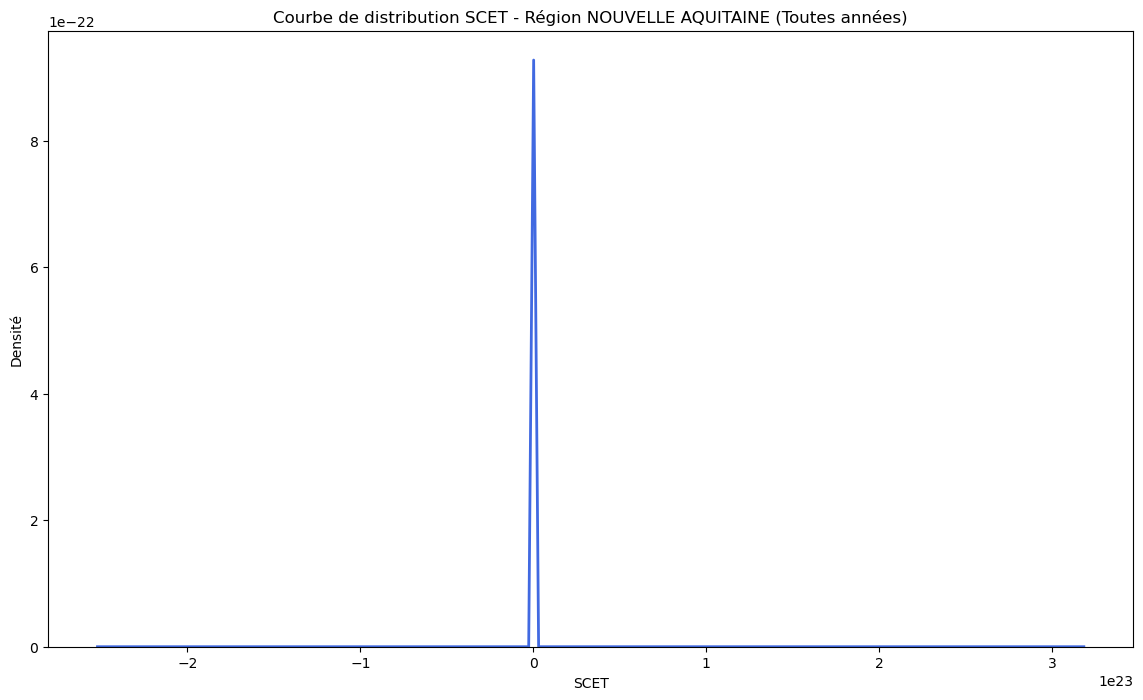

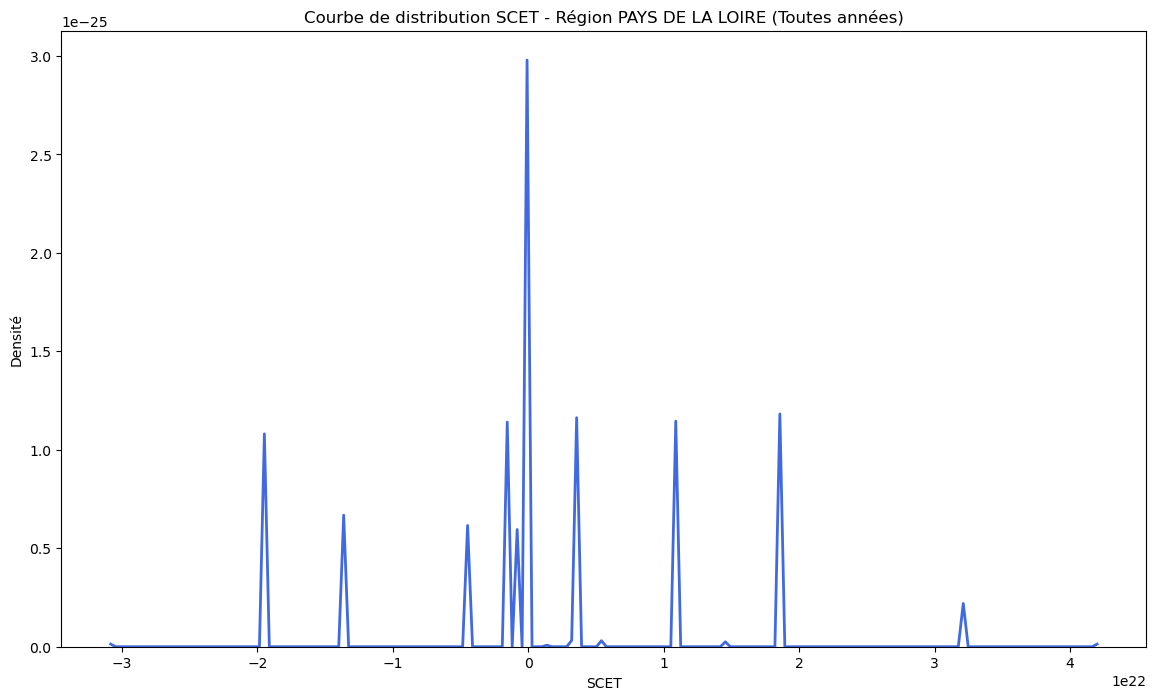

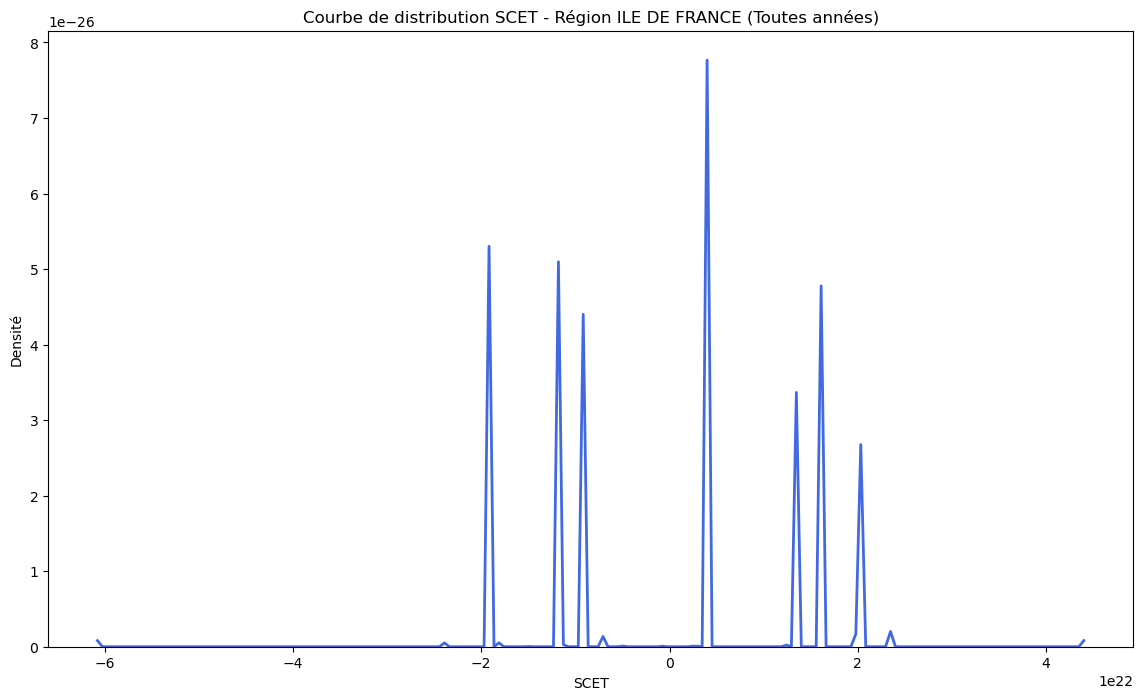

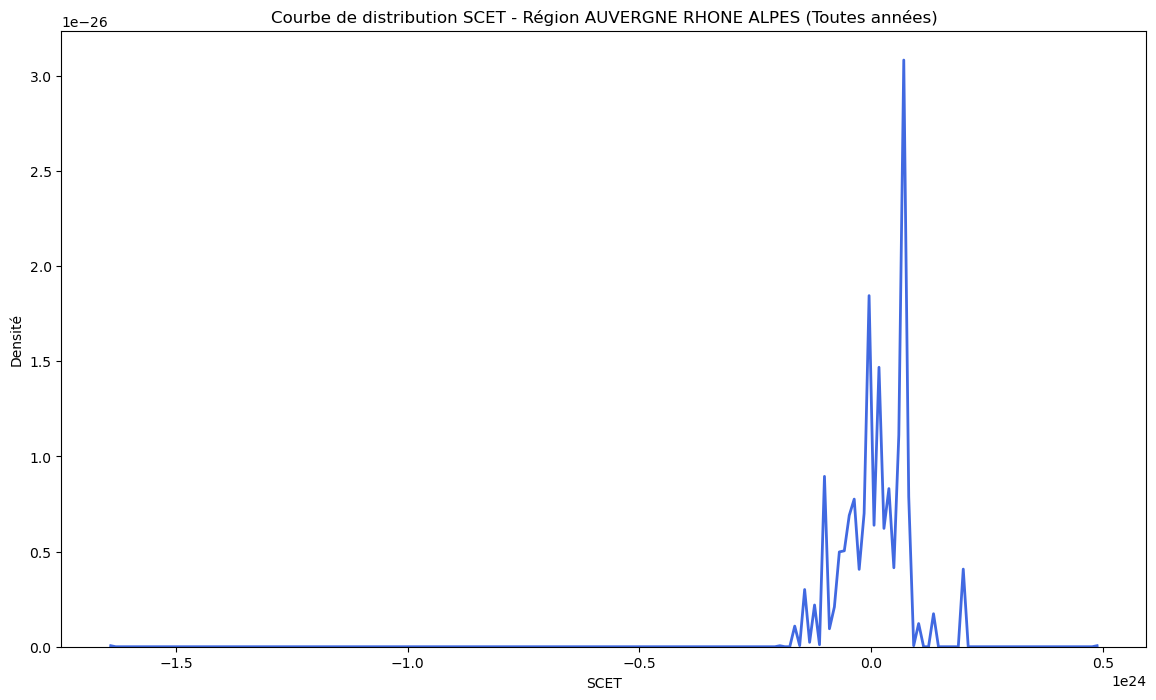

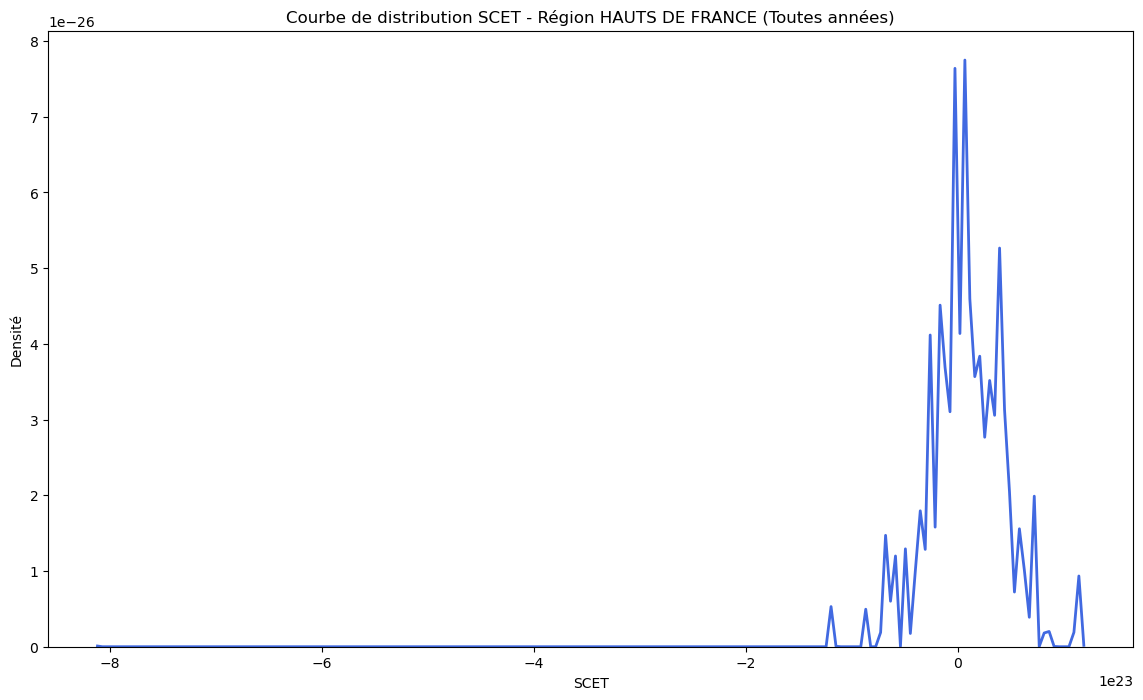

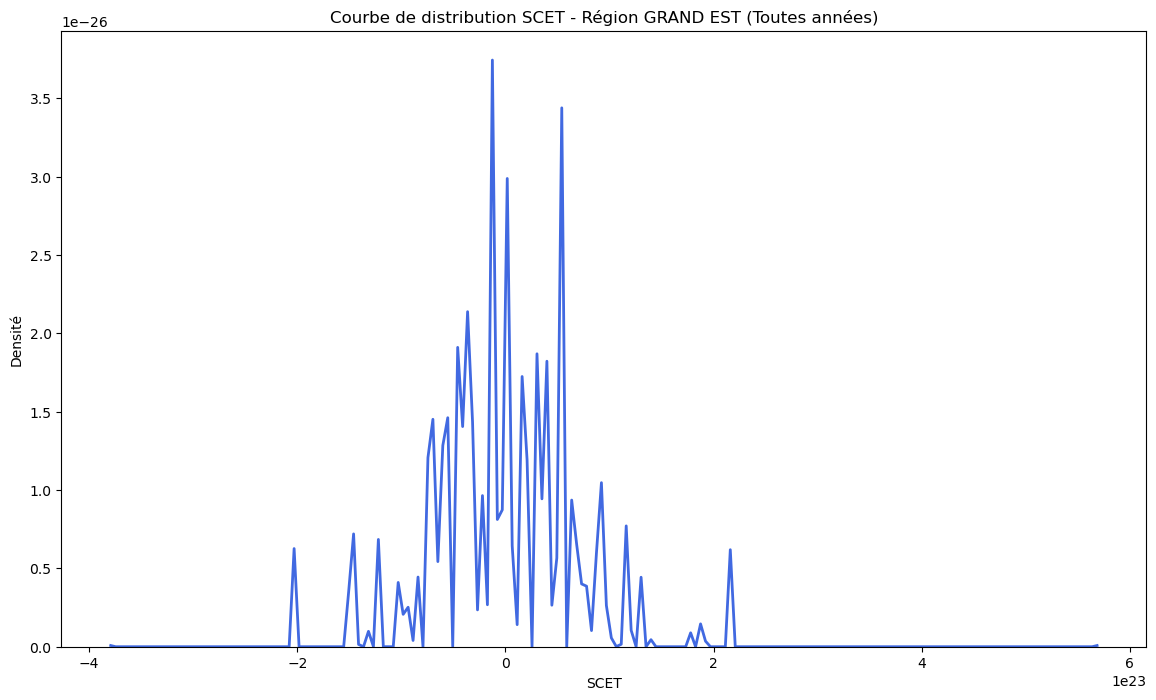

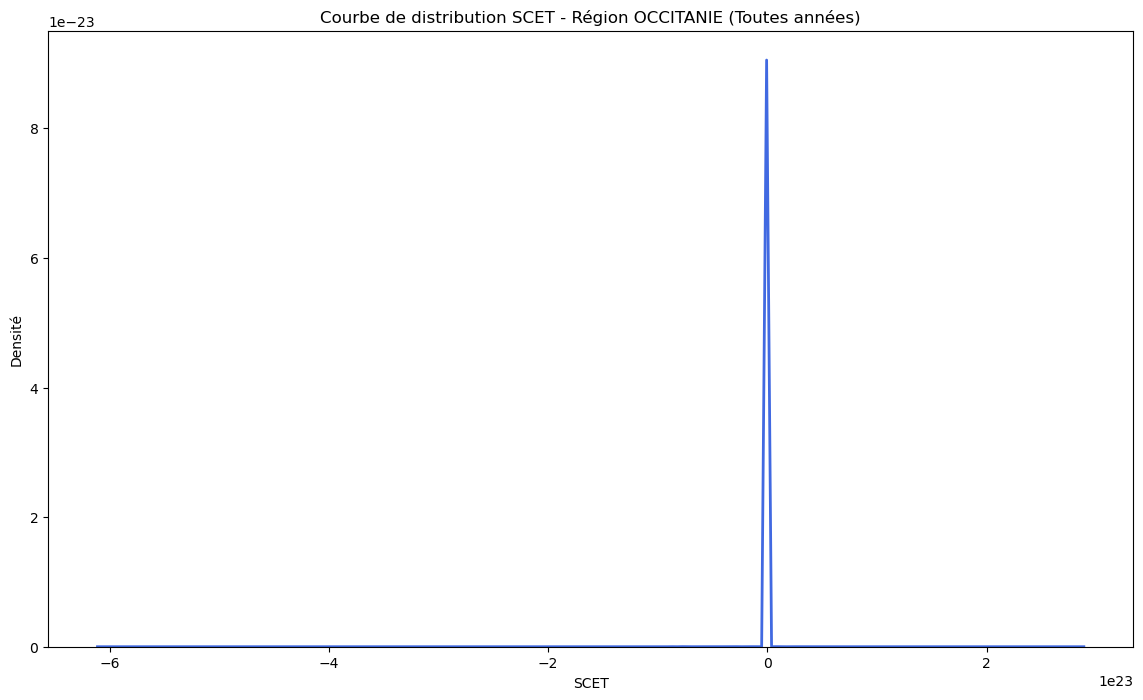

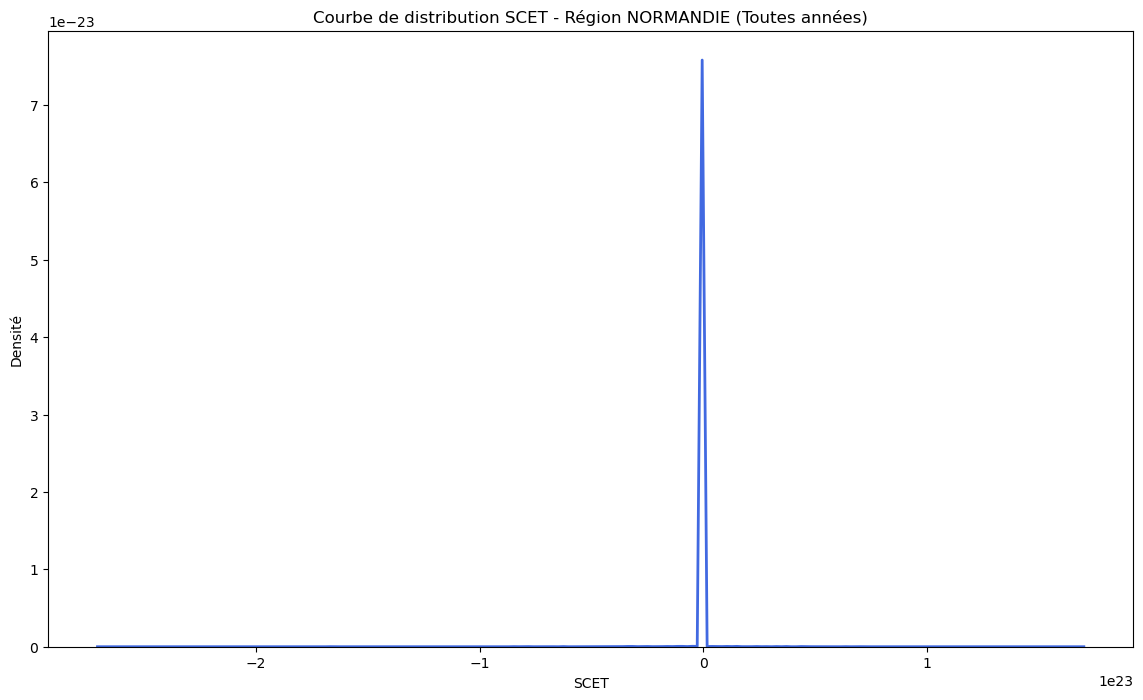

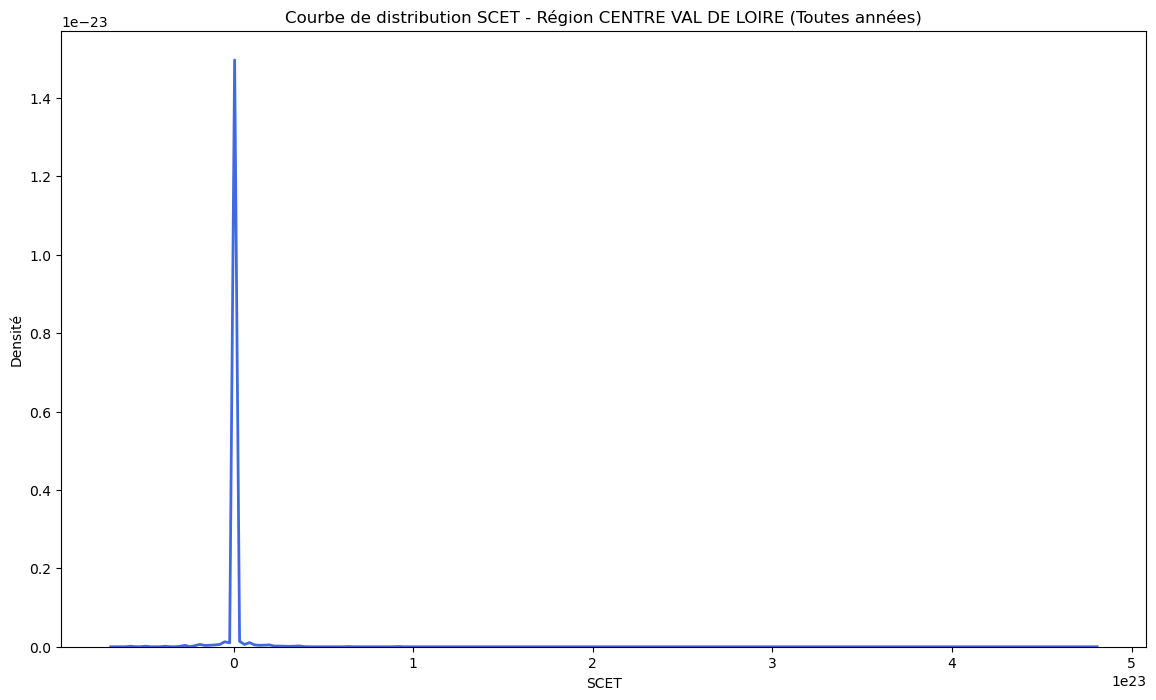

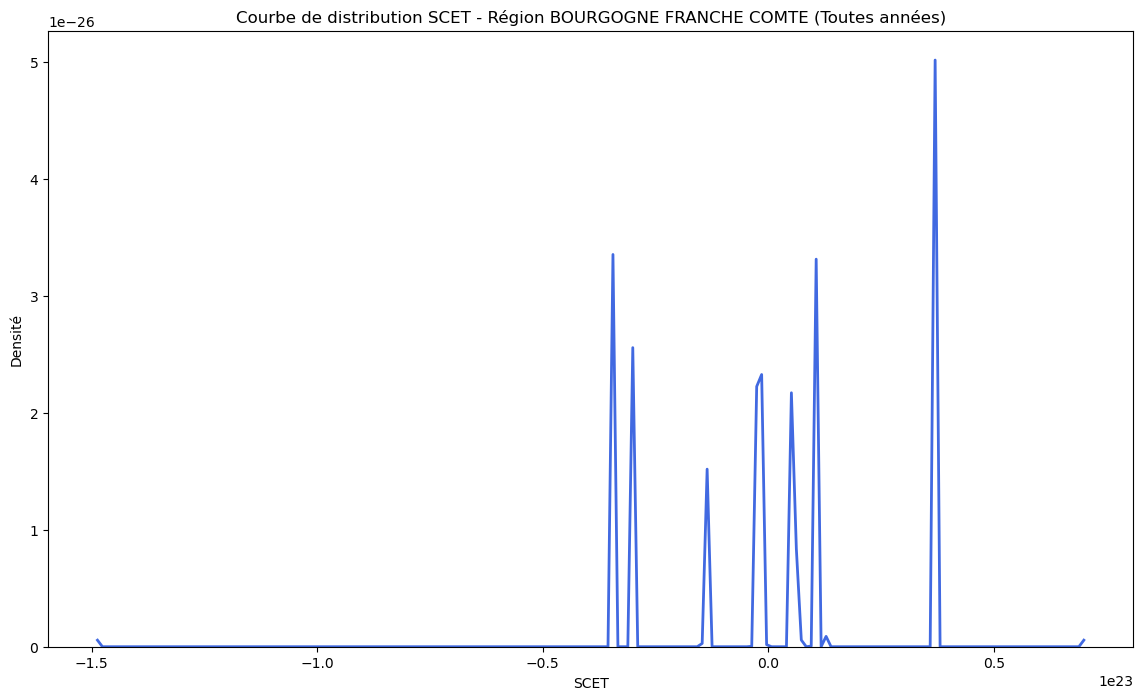

In [16]:
# *********** COURBES DE DISTRIBUTION de SCET par région, toutes années confondues

# Création d'un dossier pour enregistrer les graphiques
output_dir = "Distributions_SCET_AllYears"
os.makedirs(output_dir, exist_ok=True)

# Génération des graphiques pour chaque région
for region in regions:
    df_region = df_filtered[df_filtered['region'] == region]
    
    plt.figure(figsize=(14, 8))
    
    # Tracé de la courbe KDE pour toutes les années
    sns.kdeplot(data=df_region, x='SCET', color='royalblue', linewidth=2)
    
    plt.title(f"Courbe de distribution SCET - Région {region} (Toutes années)")
    plt.xlabel("SCET")
    plt.ylabel("Densité")
    
    # Sauvegarde du graphique
    plt.savefig(f"{output_dir}/distribution_SCET_all_years_{region}.png", dpi=300)
    plt.show()